# TriMap - comparison with t-SNE, UMAP and LargeVis

In [6]:
import trimap
from sklearn import datasets
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from matplotlib import pyplot as plt
import numpy as np
import time
import os
from timeit import default_timer as timer
import subprocess
import pandas as pd
import seaborn as sn

sn.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [20, 10]

In [7]:
def save_data_as_txt(filename, data):
    f = open(filename,"w")
    f.write(str(data.shape[0])+ " "+str(data.shape[1]) + "\n")
    for row in data:
        for element in row:
            f.write(str(float(element))+" ")
        f.write("\n")
    f.close()
def read_txt_data(filename):
    return np.loadtxt(filename, dtype=float, skiprows=1)

## MNIST

In [8]:
mnist = datasets.fetch_openml('mnist_784')
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [9]:
S_REDUCED = 10000
mnist_s_data, mnist_s_target = mnist.data[:S_REDUCED], mnist.target[:S_REDUCED]

### TriMap

In [10]:
t0 = time.time_ns()
mnist_tri = trimap.TRIMAP().fit_transform(mnist_s_data)
t_mnist_tri = time.time_ns() - t0

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 10000 points with dimension 784
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 301.652, Violated triplets: 0.0548
Iteration:  200, Loss: 280.694, Violated triplets: 0.0510
Iteration:  300, Loss: 269.254, Violated triplets: 0.0490
Iteration:  400, Loss: 262.444, Violated triplets: 0.0477
Elapsed time: 0:00:07.128033


In [11]:
plt.figure(figsize=(20,5))
plt.scatter(mnist_tri[:, 0], mnist_tri[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('TriMap', fontsize=24);

### t-SNE

In [12]:
t0 = time.time_ns()
tsne = TSNE(n_components=2, n_iter=500)
mnist_tsne = tsne.fit_transform(mnist_s_data)
t_mnist_tsne = time.time_ns() - t0

In [13]:
plt.figure(figsize=(20,5))
plt.scatter(mnist_tsne[:, 0], mnist_tsne[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('t-SNE', fontsize=24);

### UMAP

In [14]:
t0 = time.time_ns()
u = UMAP(random_state=42, n_components=2)
mnist_u = u.fit_transform(mnist_s_data)
t_mnist_u = time.time_ns() - t0

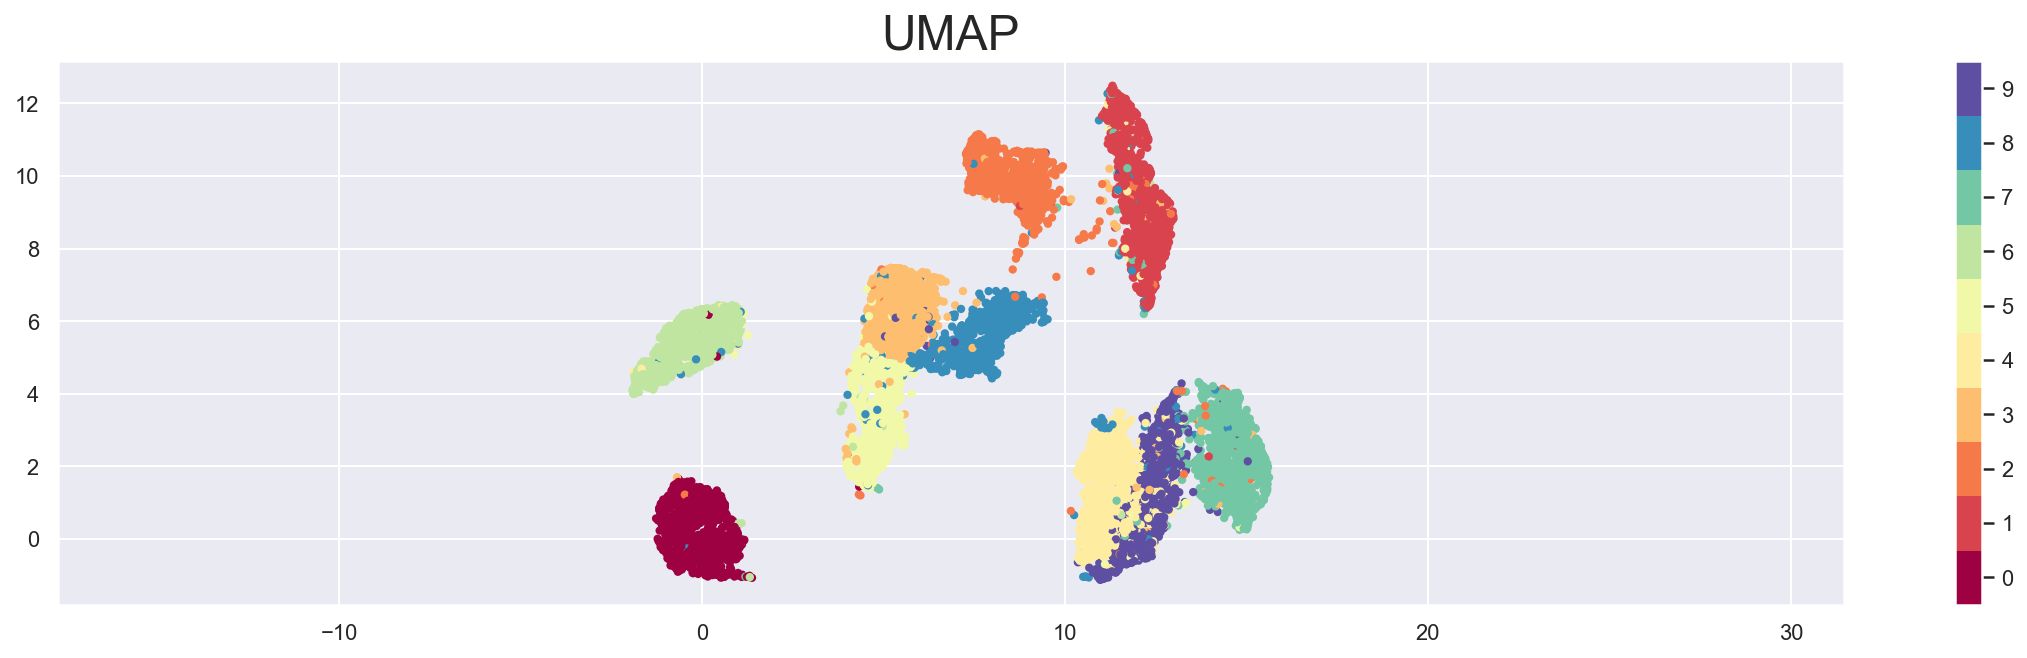

In [15]:
plt.figure(figsize=(20,5))
plt.scatter(mnist_u[:, 0], mnist_u[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP', fontsize=24);

### LargeVis

In [16]:
input_filename = "mnist_vec784D.txt"
output_filename = "mnist_vec2D.txt"

In [ ]:
save_data_as_txt(input_filename, mnist_s_data)
cmd = "start LargeVis.exe -input "+input_filename+" -output "+output_filename+" -threads 16"
start = timer()
subprocess.getoutput(cmd)
end = timer()
t_mnist_l = end - start
print(t_mnist_l)

190.33128470000008


In [17]:
t_mnist_l = 190.33128470000008

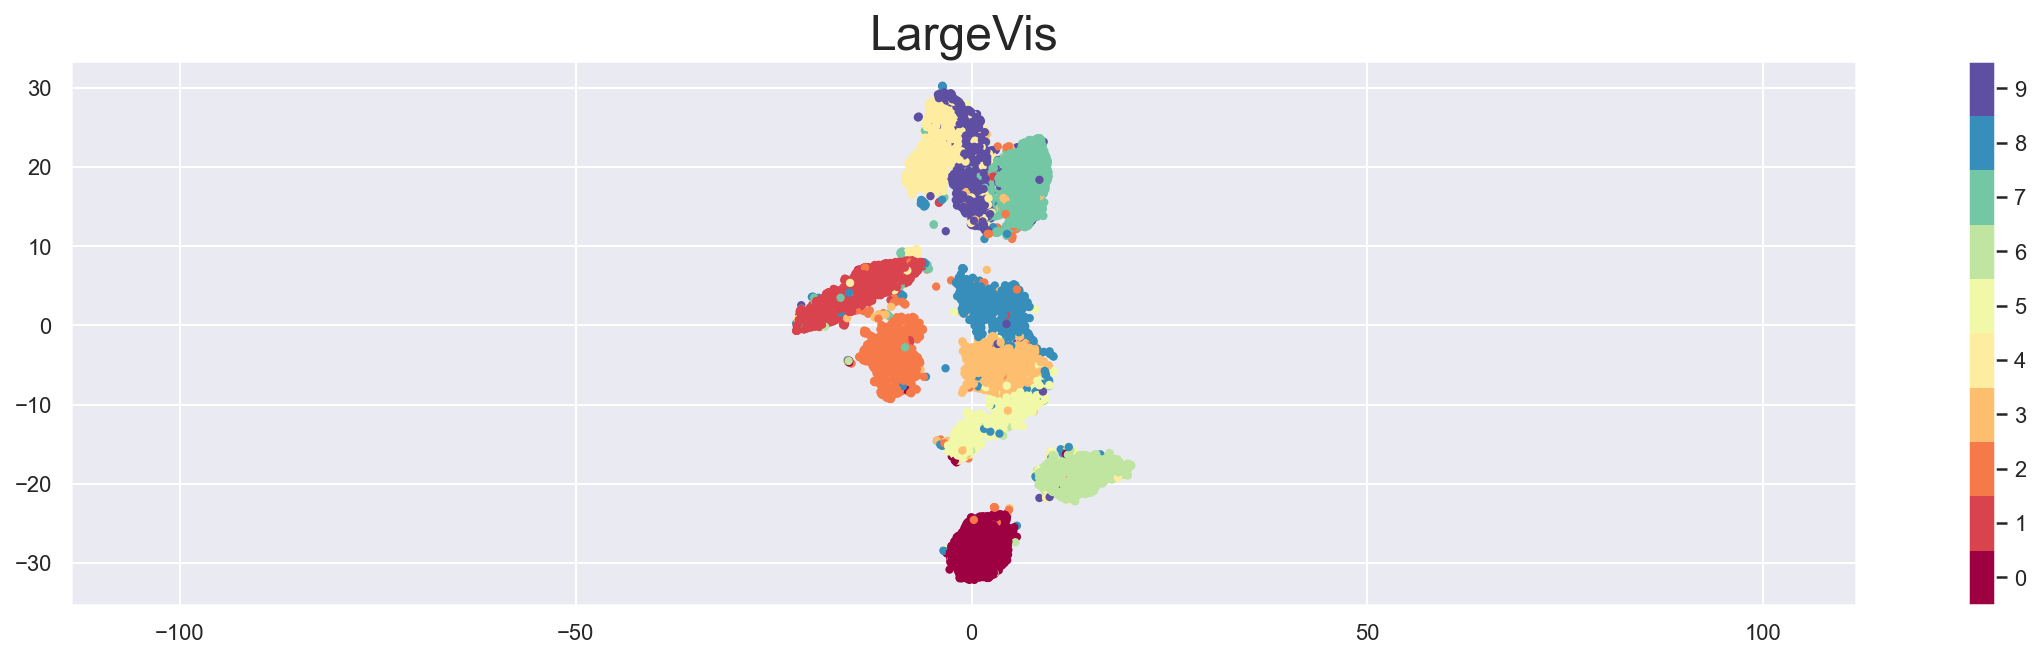

In [18]:
mnist_l = read_txt_data(output_filename)

plt.figure(figsize=(20,5))
plt.scatter(mnist_l[:, 0], mnist_l[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('LargeVis', fontsize=24);

### Comparison

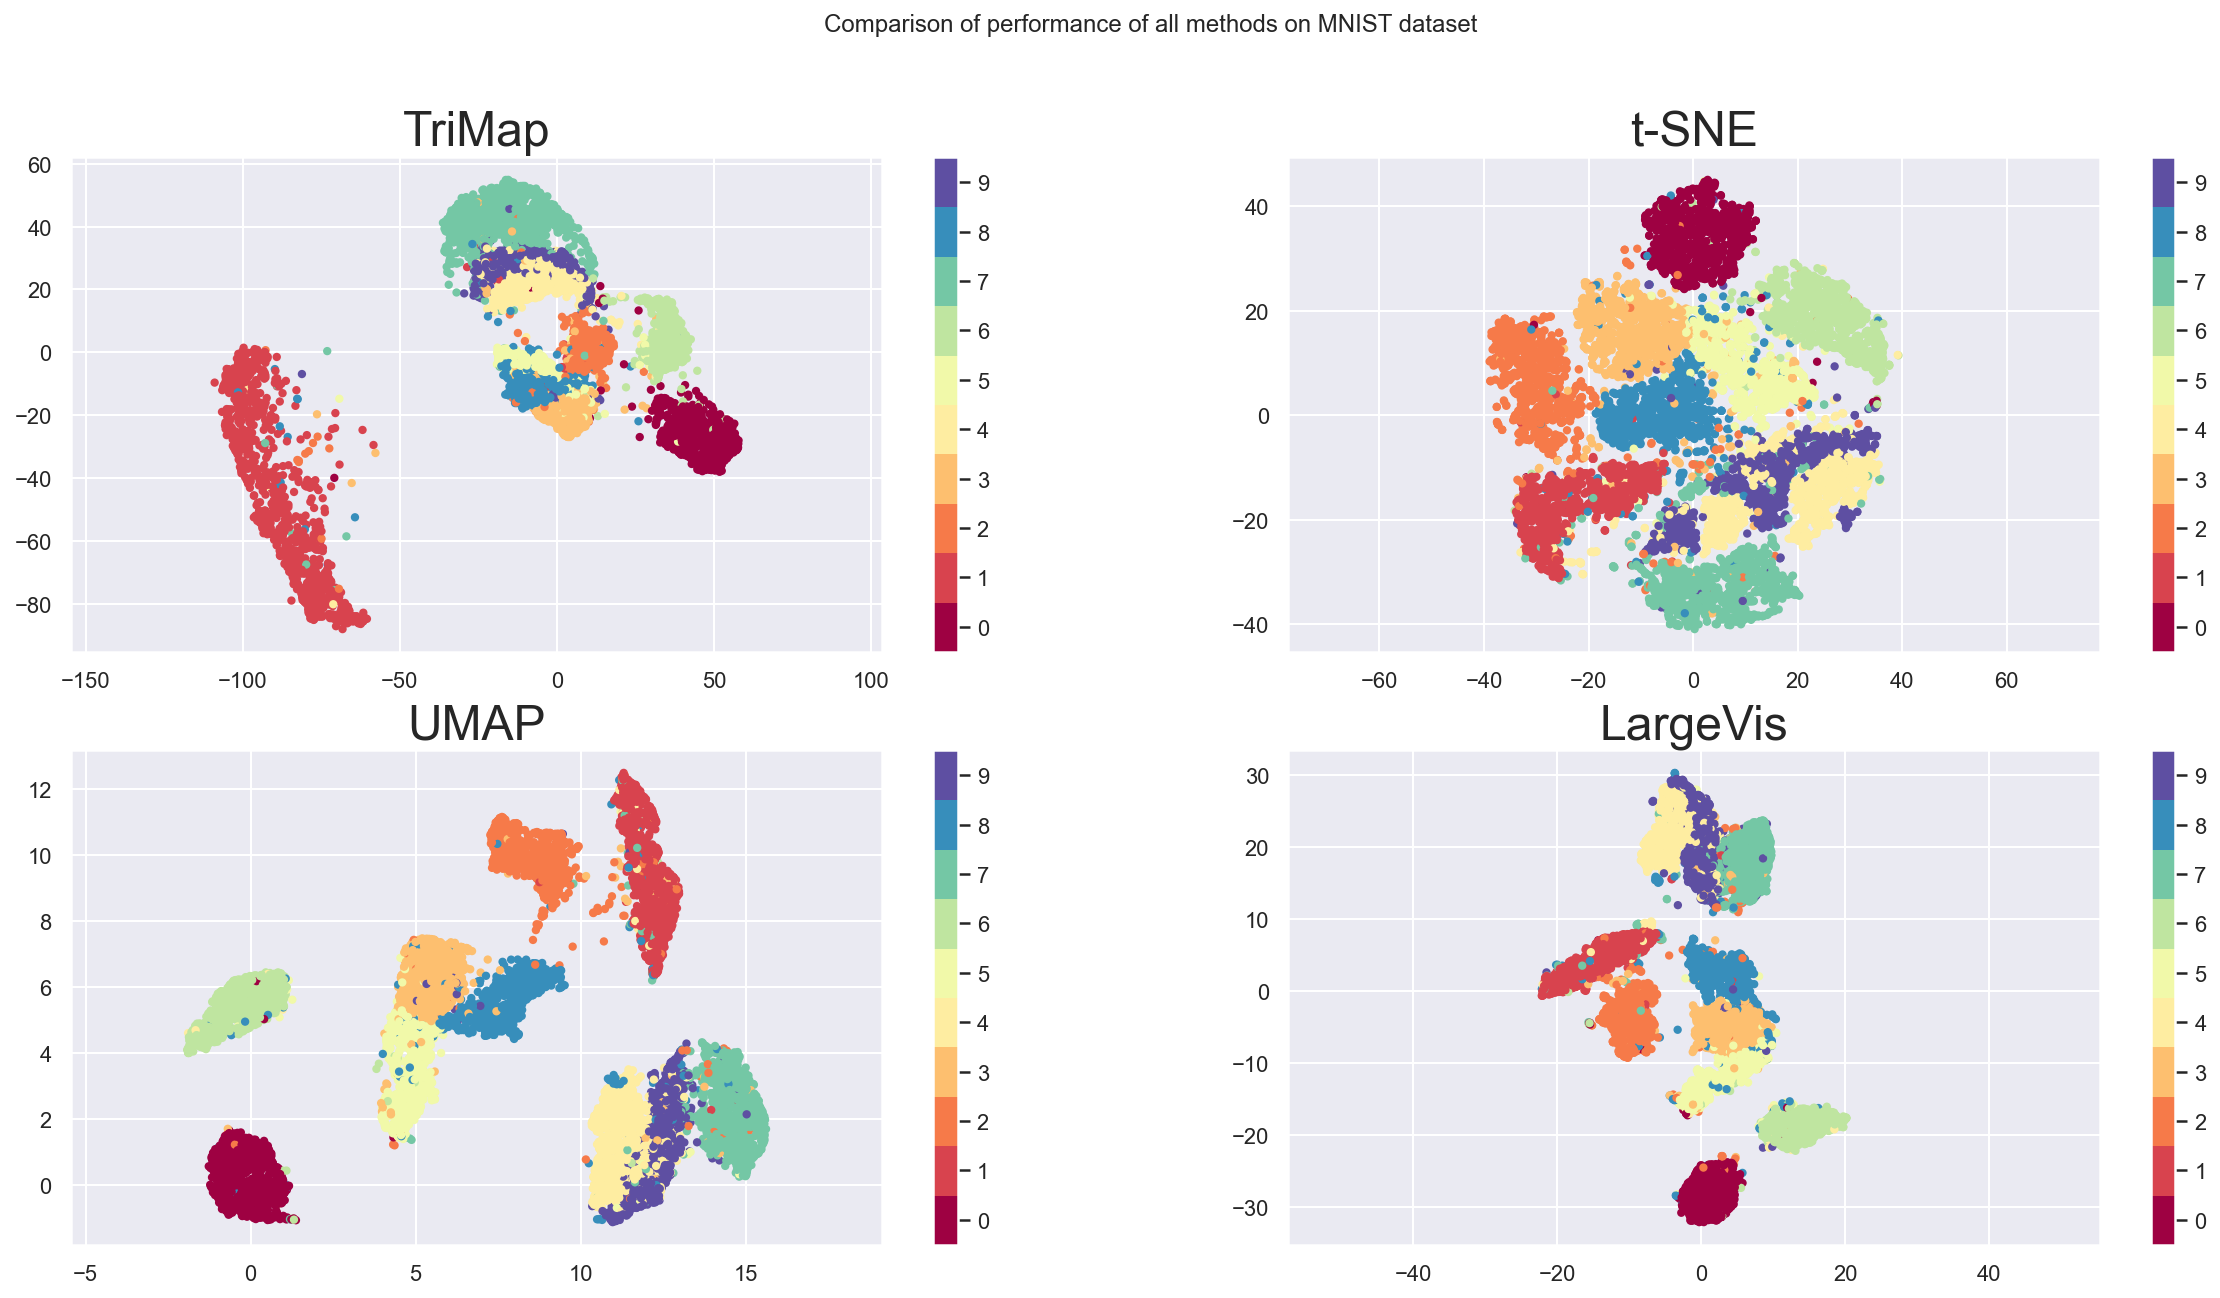

In [19]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparison of performance of all methods on MNIST dataset")

plt.subplot(2,2,1)
plt.scatter(mnist_tri[:, 0], mnist_tri[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('TriMap', fontsize=24);

plt.subplot(2,2,2)
plt.scatter(mnist_tsne[:, 0], mnist_tsne[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('t-SNE', fontsize=24);

plt.subplot(2,2,3)
plt.scatter(mnist_u[:, 0], mnist_u[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP', fontsize=24);

plt.subplot(2,2,4)
plt.scatter(mnist_l[:, 0], mnist_l[:, 1], s=10, c=mnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('LargeVis', fontsize=24);

plt.show()

In [20]:
print("Execution time in seconds")
print(f"TriMap: {t_mnist_tri/(10**9)}")
print(f"t-SNE: {t_mnist_tsne/(10**9)}")
print(f"UMAP: {t_mnist_u/(10**9)}")
print(f"LargeVis: {t_mnist_l}")

Execution time in seconds
TriMap: 7.1387748
t-SNE: 100.5617523
UMAP: 22.6458735
LargeVis: 190.33128470000008


## Fashion MNIST

In [21]:
# https://www.openml.org/d/40996
fmnist = datasets.fetch_openml(data_id=40996)
print(fmnist.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [22]:
fmnist_s_data, fmnist_s_target = fmnist.data[:S_REDUCED], fmnist.target[:S_REDUCED]

In [23]:
fmnist_labels = ['T-shirt/top','Trouser','Pullover',
                 'Dress','Coat','Sandal','Shirt',
                 'Sneaker','Bag','Ankle boot']

### TriMap

In [24]:
t0 = time.time_ns()
fmnist_tri = trimap.TRIMAP().fit_transform(fmnist_s_data)
t_fmnist_tri = time.time_ns() - t0

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 10000 points with dimension 784
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 226.134, Violated triplets: 0.0411
Iteration:  200, Loss: 216.791, Violated triplets: 0.0394
Iteration:  300, Loss: 210.254, Violated triplets: 0.0382
Iteration:  400, Loss: 205.816, Violated triplets: 0.0374
Elapsed time: 0:00:07.008894


In [25]:
plt.figure(figsize=(20,5))
plt.scatter(fmnist_tri[:, 0], fmnist_tri[:, 1], s=5, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('TriMap', fontsize=24);

### t_SNE

In [26]:
t0 = time.time_ns()
fmnist_tsne = TSNE(random_state=42, n_components=2).fit_transform(fmnist_s_data)
t_fmnist_tsne = time.time_ns() - t0

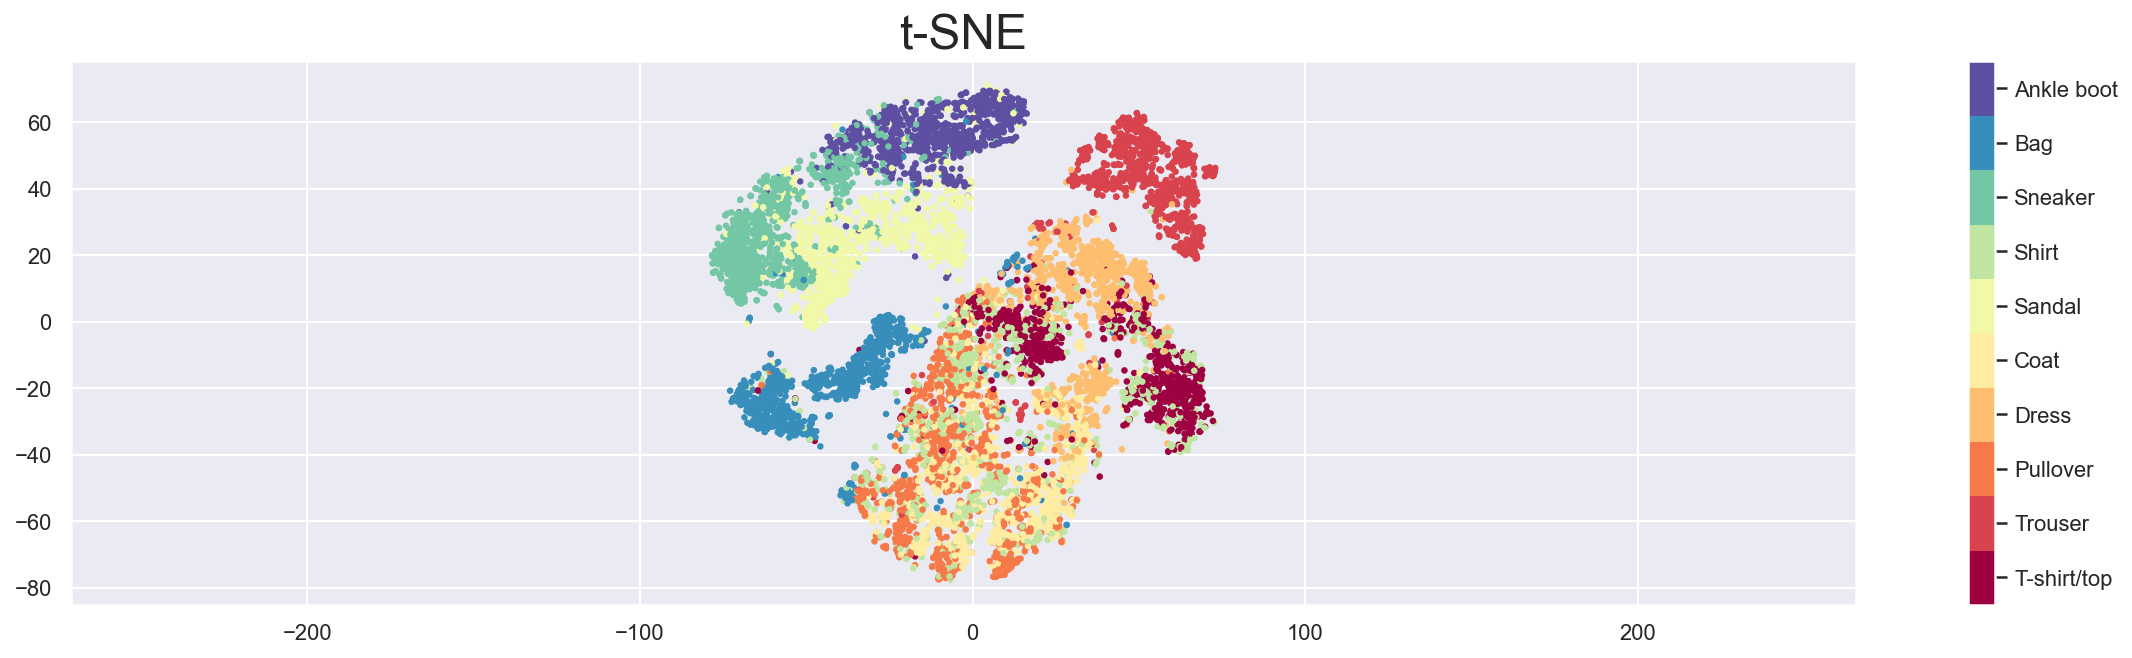

In [27]:
plt.figure(figsize=(20,5))
plt.scatter(fmnist_tsne[:, 0], fmnist_tsne[:, 1], s=5, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('t-SNE', fontsize=24);

### UMAP

In [28]:
t0 = time.time_ns()
u = UMAP(random_state=42, n_components=2)
fmnist_u = u.fit_transform(fmnist_s_data)
t_fmnist_u = time.time_ns() - t0

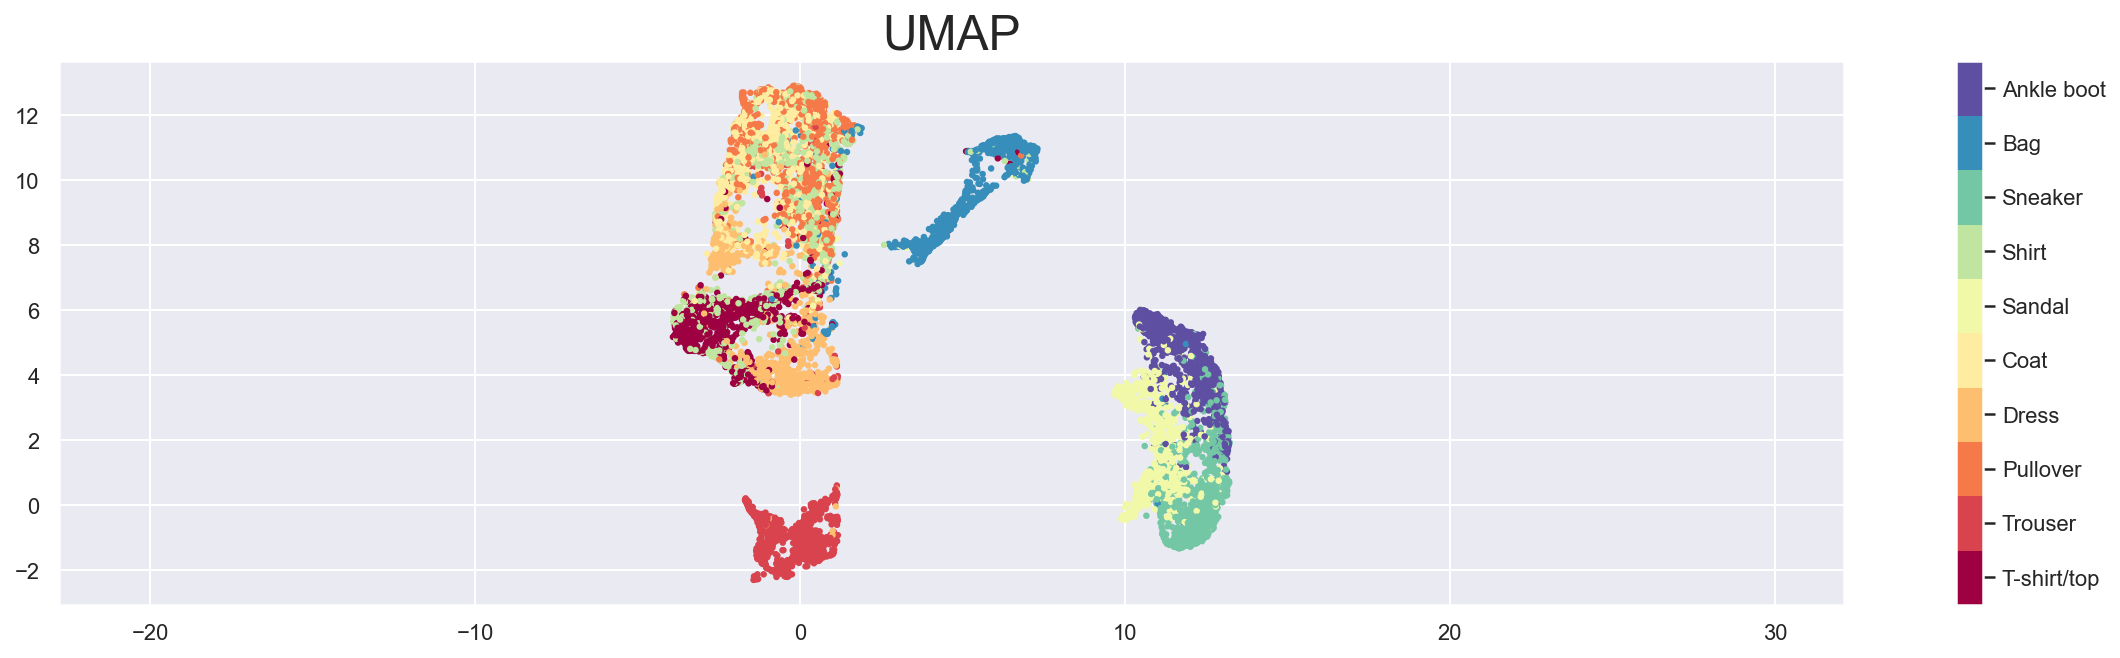

In [29]:
plt.figure(figsize=(20,5))
plt.scatter(fmnist_u[:, 0], fmnist_u[:, 1], s=5, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('UMAP', fontsize=24);

### LargeVis

In [30]:
input_filename = "fmnist_vec784D.txt"
output_filename = "fmnist_vec2D.txt"

In [ ]:
save_data_as_txt(input_filename, fmnist_s_data)
cmd = "start LargeVis.exe -input "+input_filename+" -output "+output_filename+" -threads 16"
start = timer()
subprocess.getoutput(cmd)
end = timer()
t_fmnist_l = end - start
print(t_fmnist_l)

191.58950429999993


In [31]:
t_fmnist_l = 191.58950429999993

In [32]:
fmnist_l = read_txt_data(output_filename)

plt.figure(figsize=(20,5))
plt.scatter(fmnist_l[:, 0], fmnist_l[:, 1], s=5, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('LargeVis', fontsize=24);

### Comparison

In [33]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparison of performance of all methods on Fashion MNIST dataset")

plt.subplot(2,2,1)
plt.scatter(fmnist_tri[:, 0], fmnist_tri[:, 1], s=10, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('TriMap', fontsize=24);

plt.subplot(2,2,2)
plt.scatter(fmnist_tsne[:, 0], fmnist_tsne[:, 1], s=10, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('t-SNE', fontsize=24);

plt.subplot(2,2,3)
plt.scatter(fmnist_u[:, 0], fmnist_u[:, 1], s=10, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('UMAP', fontsize=24);

plt.subplot(2,2,4)
plt.scatter(fmnist_l[:, 0], fmnist_l[:, 1], s=10, c=fmnist_s_target.astype(int), cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(11)-0.5)
colorbar.set_ticks(np.arange(10))
colorbar.set_ticklabels(fmnist_labels)
plt.title('LargeVis', fontsize=24);

plt.show()

In [34]:
print("Execution time in seconds")
print(f"TriMap: {t_fmnist_tri/(10**9)}")
print(f"t-SNE: {t_fmnist_tsne/(10**9)}")
print(f"UMAP: {t_fmnist_u/(10**9)}")
print(f"LargeVis: {t_fmnist_l}")

Execution time in seconds
TriMap: 7.0196382
t-SNE: 127.6624939
UMAP: 12.3480894
LargeVis: 191.58950429999993


## 20 Newsgroups

In [35]:
news = datasets.fetch_20newsgroups_vectorized()
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [36]:
news_s_data, news_s_target = news.data[:S_REDUCED], news.target[:S_REDUCED]

### TriMap

In [37]:
t0 = time.time_ns()
news_tri = trimap.TRIMAP().fit_transform(news_s_data)
t_news_tri = time.time_ns() - t0

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 10000 points with dimension 130107
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 564.856, Violated triplets: 0.1027
Iteration:  200, Loss: 552.662, Violated triplets: 0.1005
Iteration:  300, Loss: 547.101, Violated triplets: 0.0995
Iteration:  400, Loss: 544.163, Violated triplets: 0.0989
Elapsed time: 0:00:43.898641


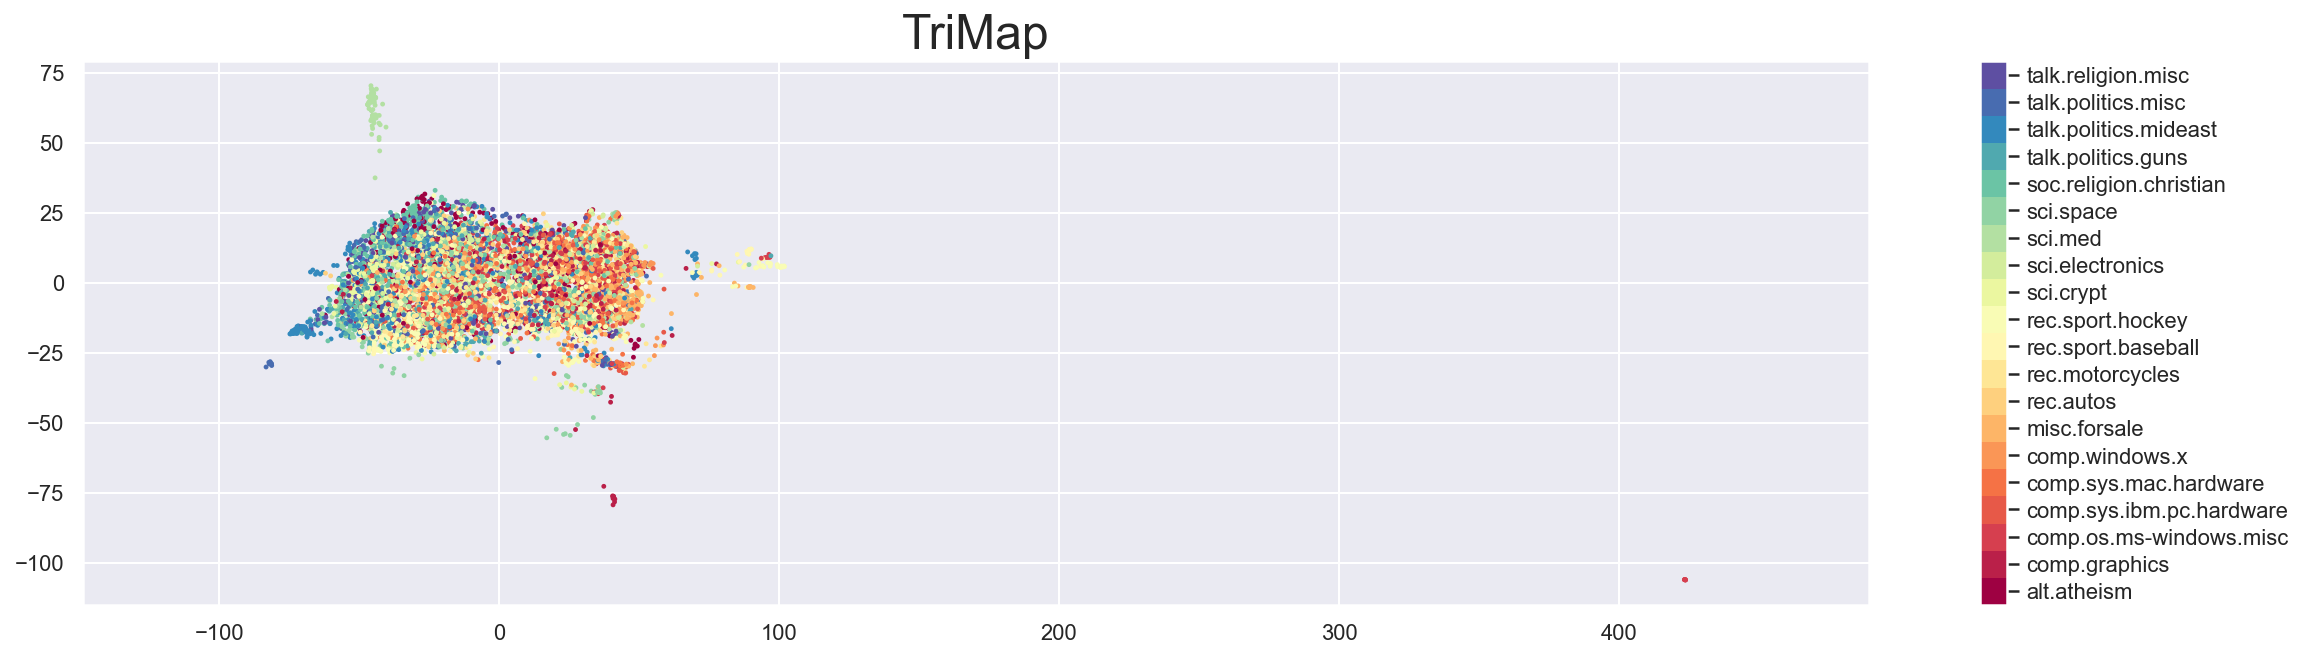

In [38]:
plt.figure(figsize=(20,5))
plt.scatter(news_tri[:, 0], news_tri[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('TriMap', fontsize=24);

### t-SNE

In [39]:
t0 = time.time_ns()
tsne = TSNE(n_components=2)
news_tsne = tsne.fit_transform(news_s_data)
t_news_tsne = time.time_ns() - t0

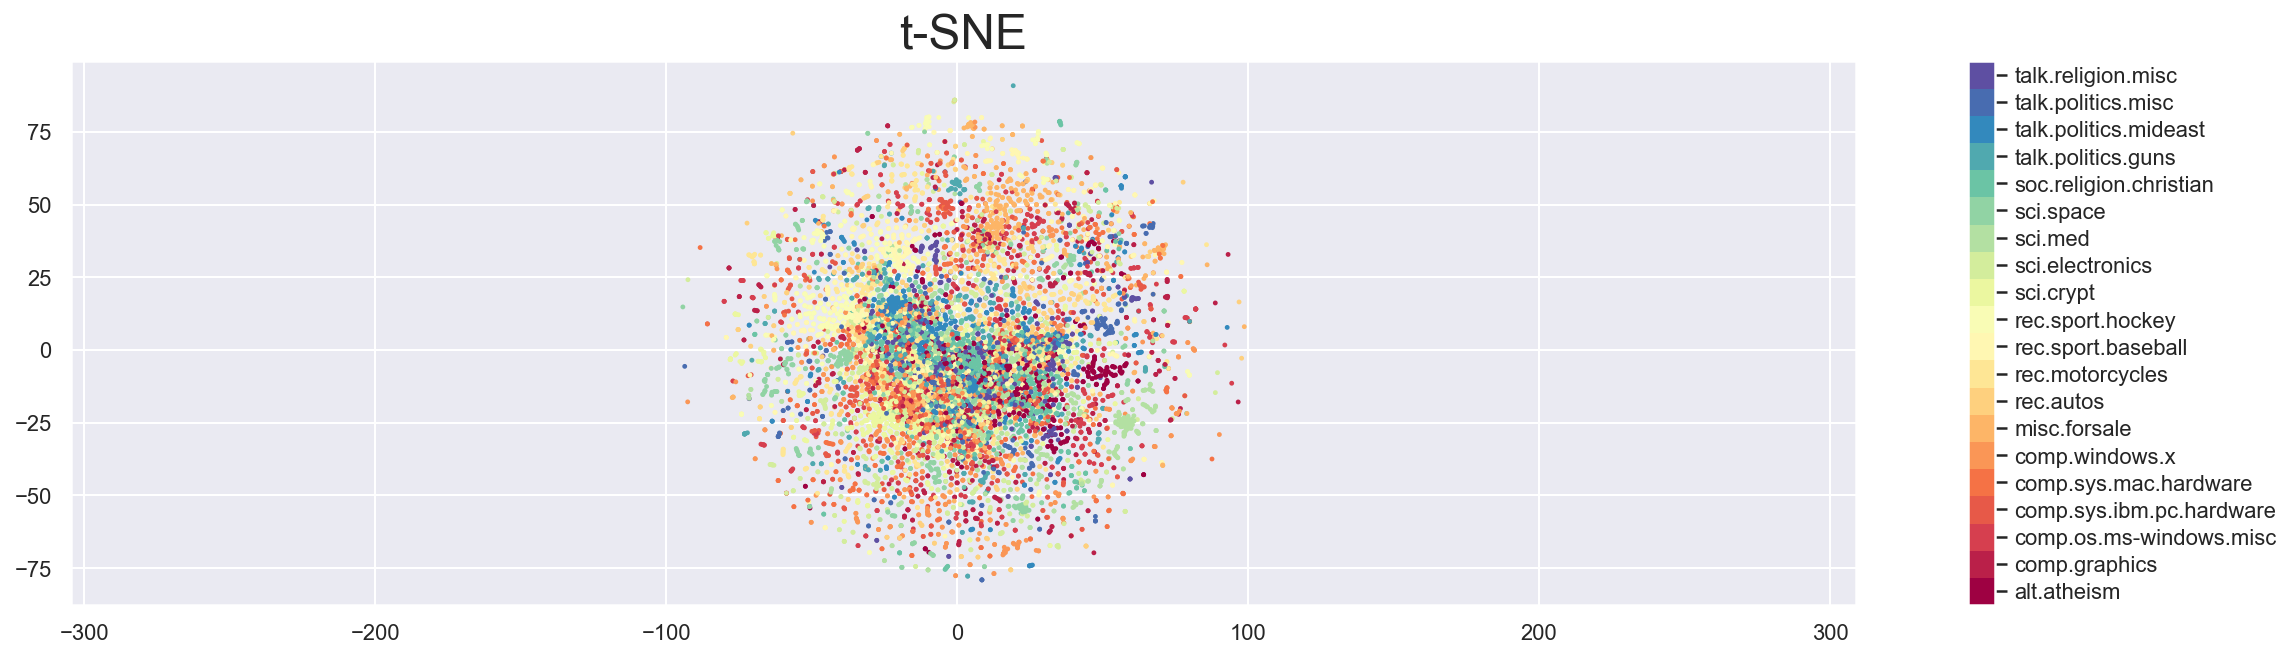

In [40]:
plt.figure(figsize=(20,5))
plt.scatter(news_tsne[:, 0], news_tsne[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('t-SNE', fontsize=24);

### UMAP

In [41]:
t0 = time.time_ns()
u = UMAP(random_state=42, n_components=2)
news_u = u.fit_transform(news_s_data)
t_news_u = time.time_ns() - t0

In [42]:
plt.figure(figsize=(20,5))
plt.scatter(news_u[:, 0], news_u[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('UMAP', fontsize=24);

### LargeVis

In [43]:
input_filename = "news_vec130107D.txt"
output_filename = "news_vec2D.txt"

In [ ]:
save_data_as_txt(input_filename, news_s_data.toarray())
cmd = "start LargeVis.exe -input "+input_filename+" -output "+output_filename+" -threads 16"
start = timer()
subprocess.getoutput(cmd)
end = timer()
t_news_l = end - start
print(t_news_l)

2464.3152386000006


In [44]:
t_news_l = 2464.3152386000006

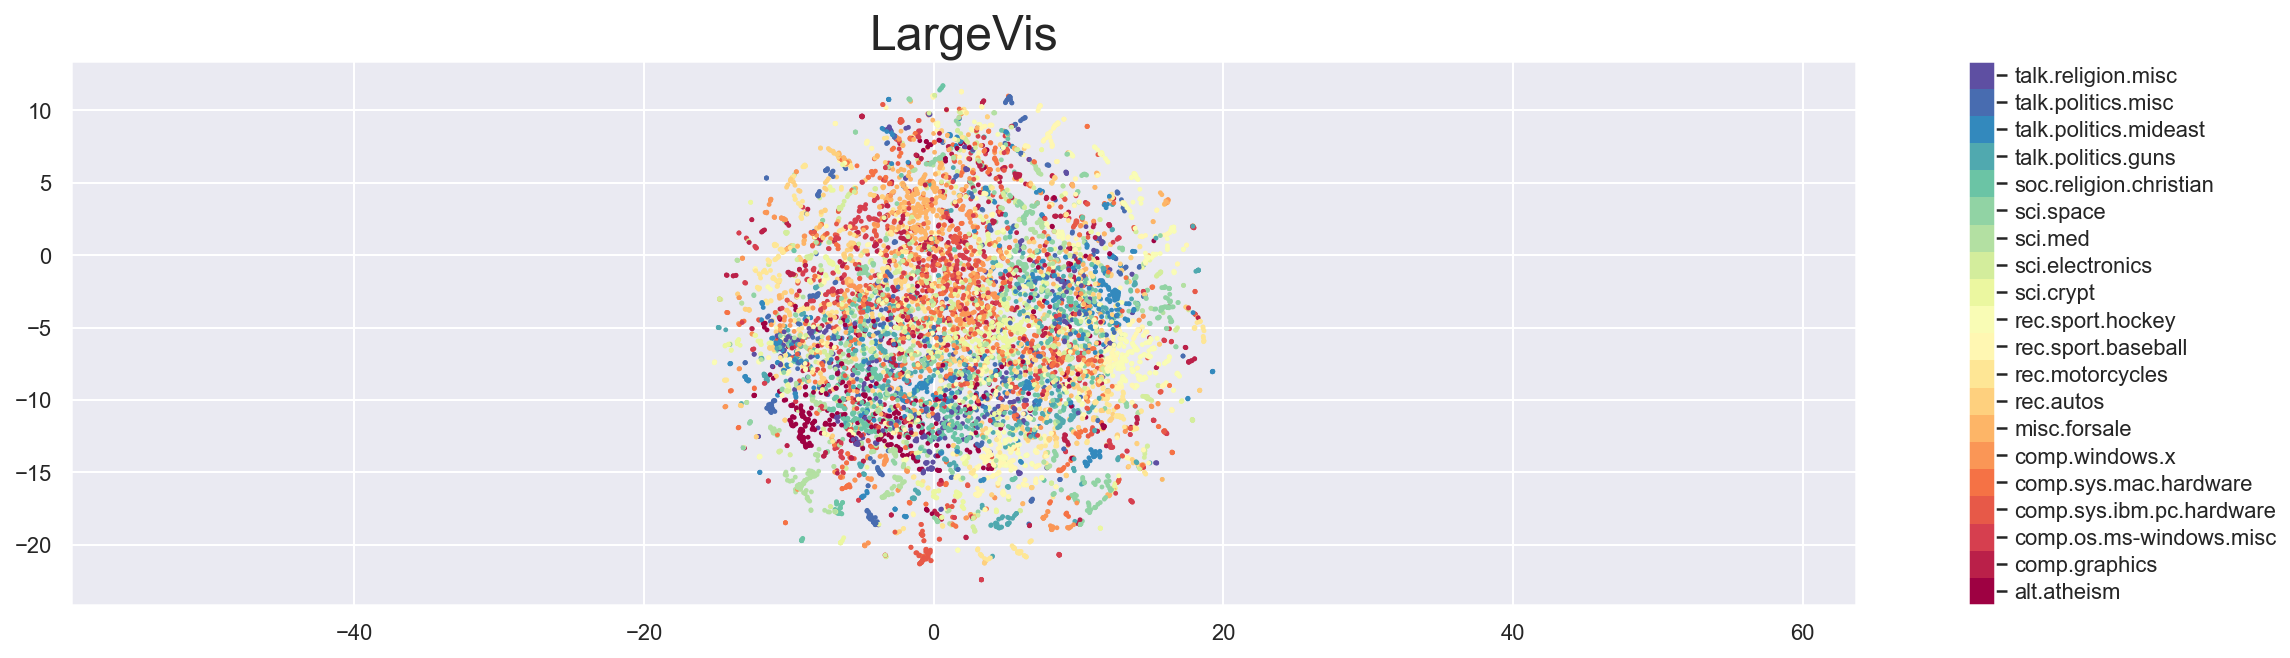

In [45]:
news_l = read_txt_data(output_filename)

plt.figure(figsize=(20,5))
plt.scatter(news_l[:, 0], news_l[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('LargeVis', fontsize=24);

### Comparison

In [46]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparison of performance of all methods on 20 Newsgroups dataset")

plt.subplot(2,2,1)
plt.scatter(news_tri[:, 0], news_tri[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('TriMap', fontsize=24);

plt.subplot(2,2,2)
plt.scatter(news_tsne[:, 0], news_tsne[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('t-SNE', fontsize=24);

plt.subplot(2,2,3)
plt.scatter(news_u[:, 0], news_u[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('UMAP', fontsize=24);

plt.subplot(2,2,4)
plt.scatter(news_l[:, 0], news_l[:, 1], s=2, c=news_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(21)-0.5)
colorbar.set_ticks(np.arange(20))
colorbar.set_ticklabels(news.target_names)
plt.title('LargeVis', fontsize=24);

plt.show()

In [47]:
print("Execution time in seconds")
print(f"TriMap: {t_news_tri/(10**9)}")
print(f"t-SNE: {t_news_tsne/(10**9)}")
print(f"UMAP: {t_news_u/(10**9)}")
print(f"LargeVis: {t_news_l}")

Execution time in seconds
TriMap: 43.9089273
t-SNE: 38.8696145
UMAP: 27.2086207
LargeVis: 2464.3152386000006


## Cover Types

### TriMap

In [48]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()

In [49]:
covtype_s_data, covtype_s_target = covtype.data[:50000], covtype.target[:50000]

In [50]:
covertype_target_names = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine', \
                          'Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']

In [51]:
t0 = time.time_ns()
covtype_tri = trimap.TRIMAP().fit_transform(covtype_s_data)
t_covtype_tri = time.time_ns() - t0

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 50000 points with dimension 54
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 3230.596, Violated triplets: 0.1175
Iteration:  200, Loss: 2649.821, Violated triplets: 0.0964
Iteration:  300, Loss: 2440.290, Violated triplets: 0.0887
Iteration:  400, Loss: 2372.240, Violated triplets: 0.0863
Elapsed time: 0:00:37.072411


In [52]:
plt.figure(figsize=(20,5))
plt.scatter(covtype_tri[:, 0], covtype_tri[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('TriMap', fontsize=24);

### t-SNE

In [53]:
t0 = time.time_ns()
tsne = TSNE(n_components=2)
covtype_tsne = tsne.fit_transform(covtype_s_data)
t_covtype_tsne = time.time_ns() - t0

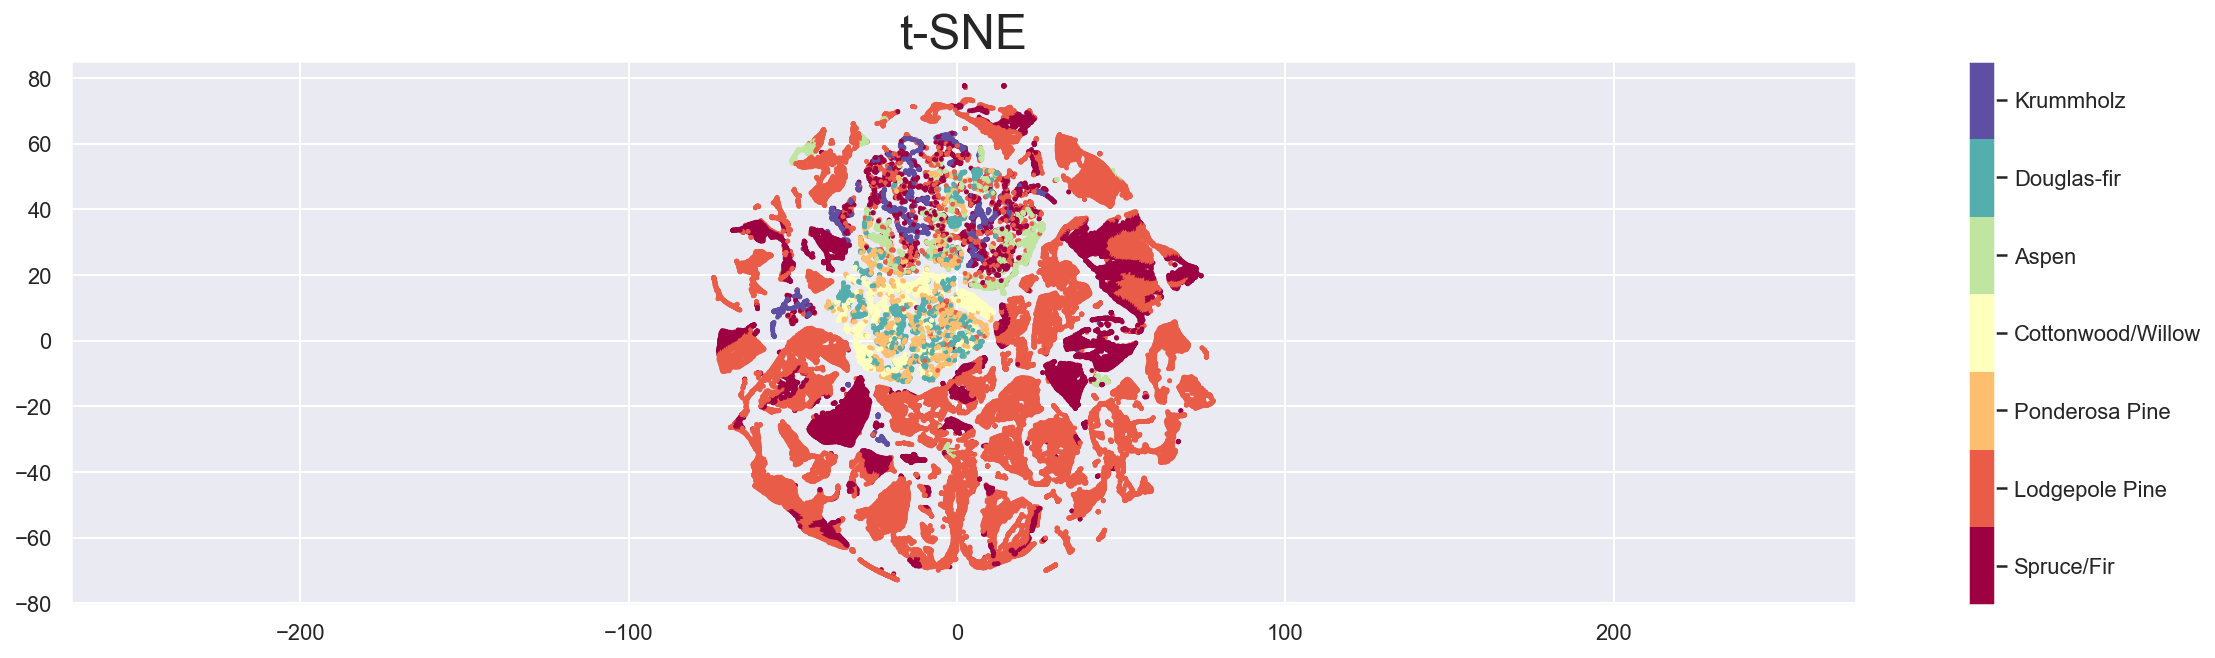

In [54]:
plt.figure(figsize=(20,5))
plt.scatter(covtype_tsne[:, 0], covtype_tsne[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('t-SNE', fontsize=24);

### UMAP

In [55]:
t0 = time.time_ns()
u = UMAP(random_state=42, n_components=2)
covtype_u = u.fit_transform(covtype_s_data)
t_covtype_u = time.time_ns() - t0

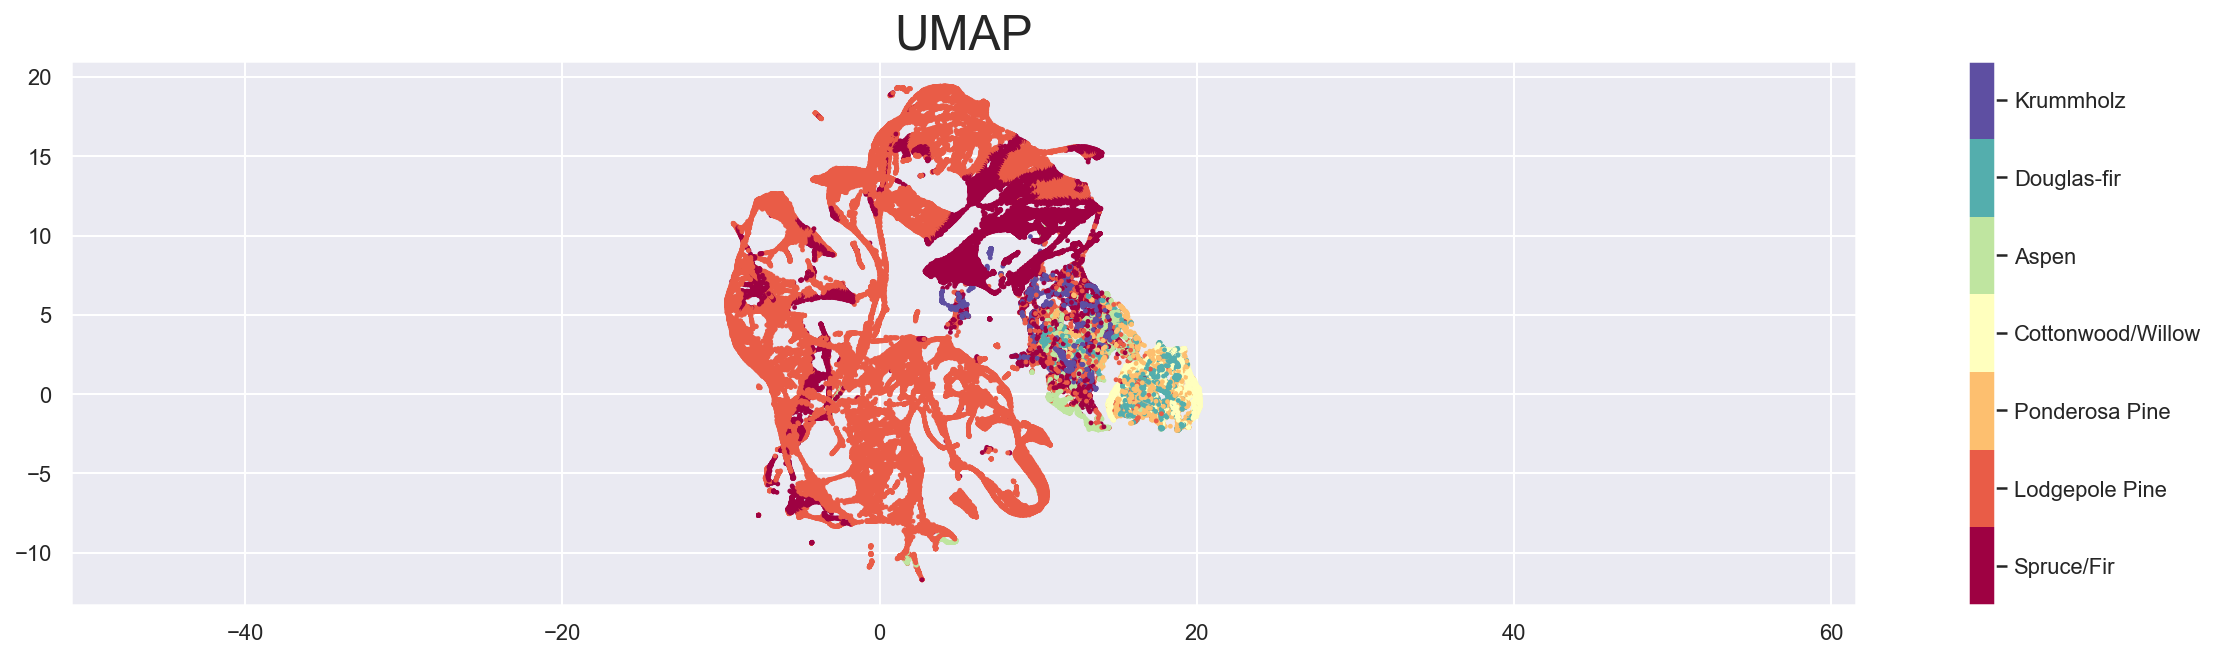

In [56]:
plt.figure(figsize=(20,5))
plt.scatter(covtype_u[:, 0], covtype_u[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('UMAP', fontsize=24);

### LargeVis

In [57]:
input_filename = "covtype_vec54D.txt"
output_filename = "covtype_vec2D.txt"

In [ ]:
save_data_as_txt(input_filename, covtype_s_data)
cmd = "start LargeVis.exe -input "+input_filename+" -output "+output_filename+" -threads 16"
start = timer()
subprocess.getoutput(cmd)
end = timer()
t_covtype_l = end - start
print(t_covtype_l)

276.7667885999999


In [58]:
t_covtype_l = 276.7667885999999

In [59]:
covtype_l = read_txt_data(output_filename)

plt.figure(figsize=(20,5))
plt.scatter(covtype_l[:, 0], covtype_l[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('LargeVis', fontsize=24);

### Comparison

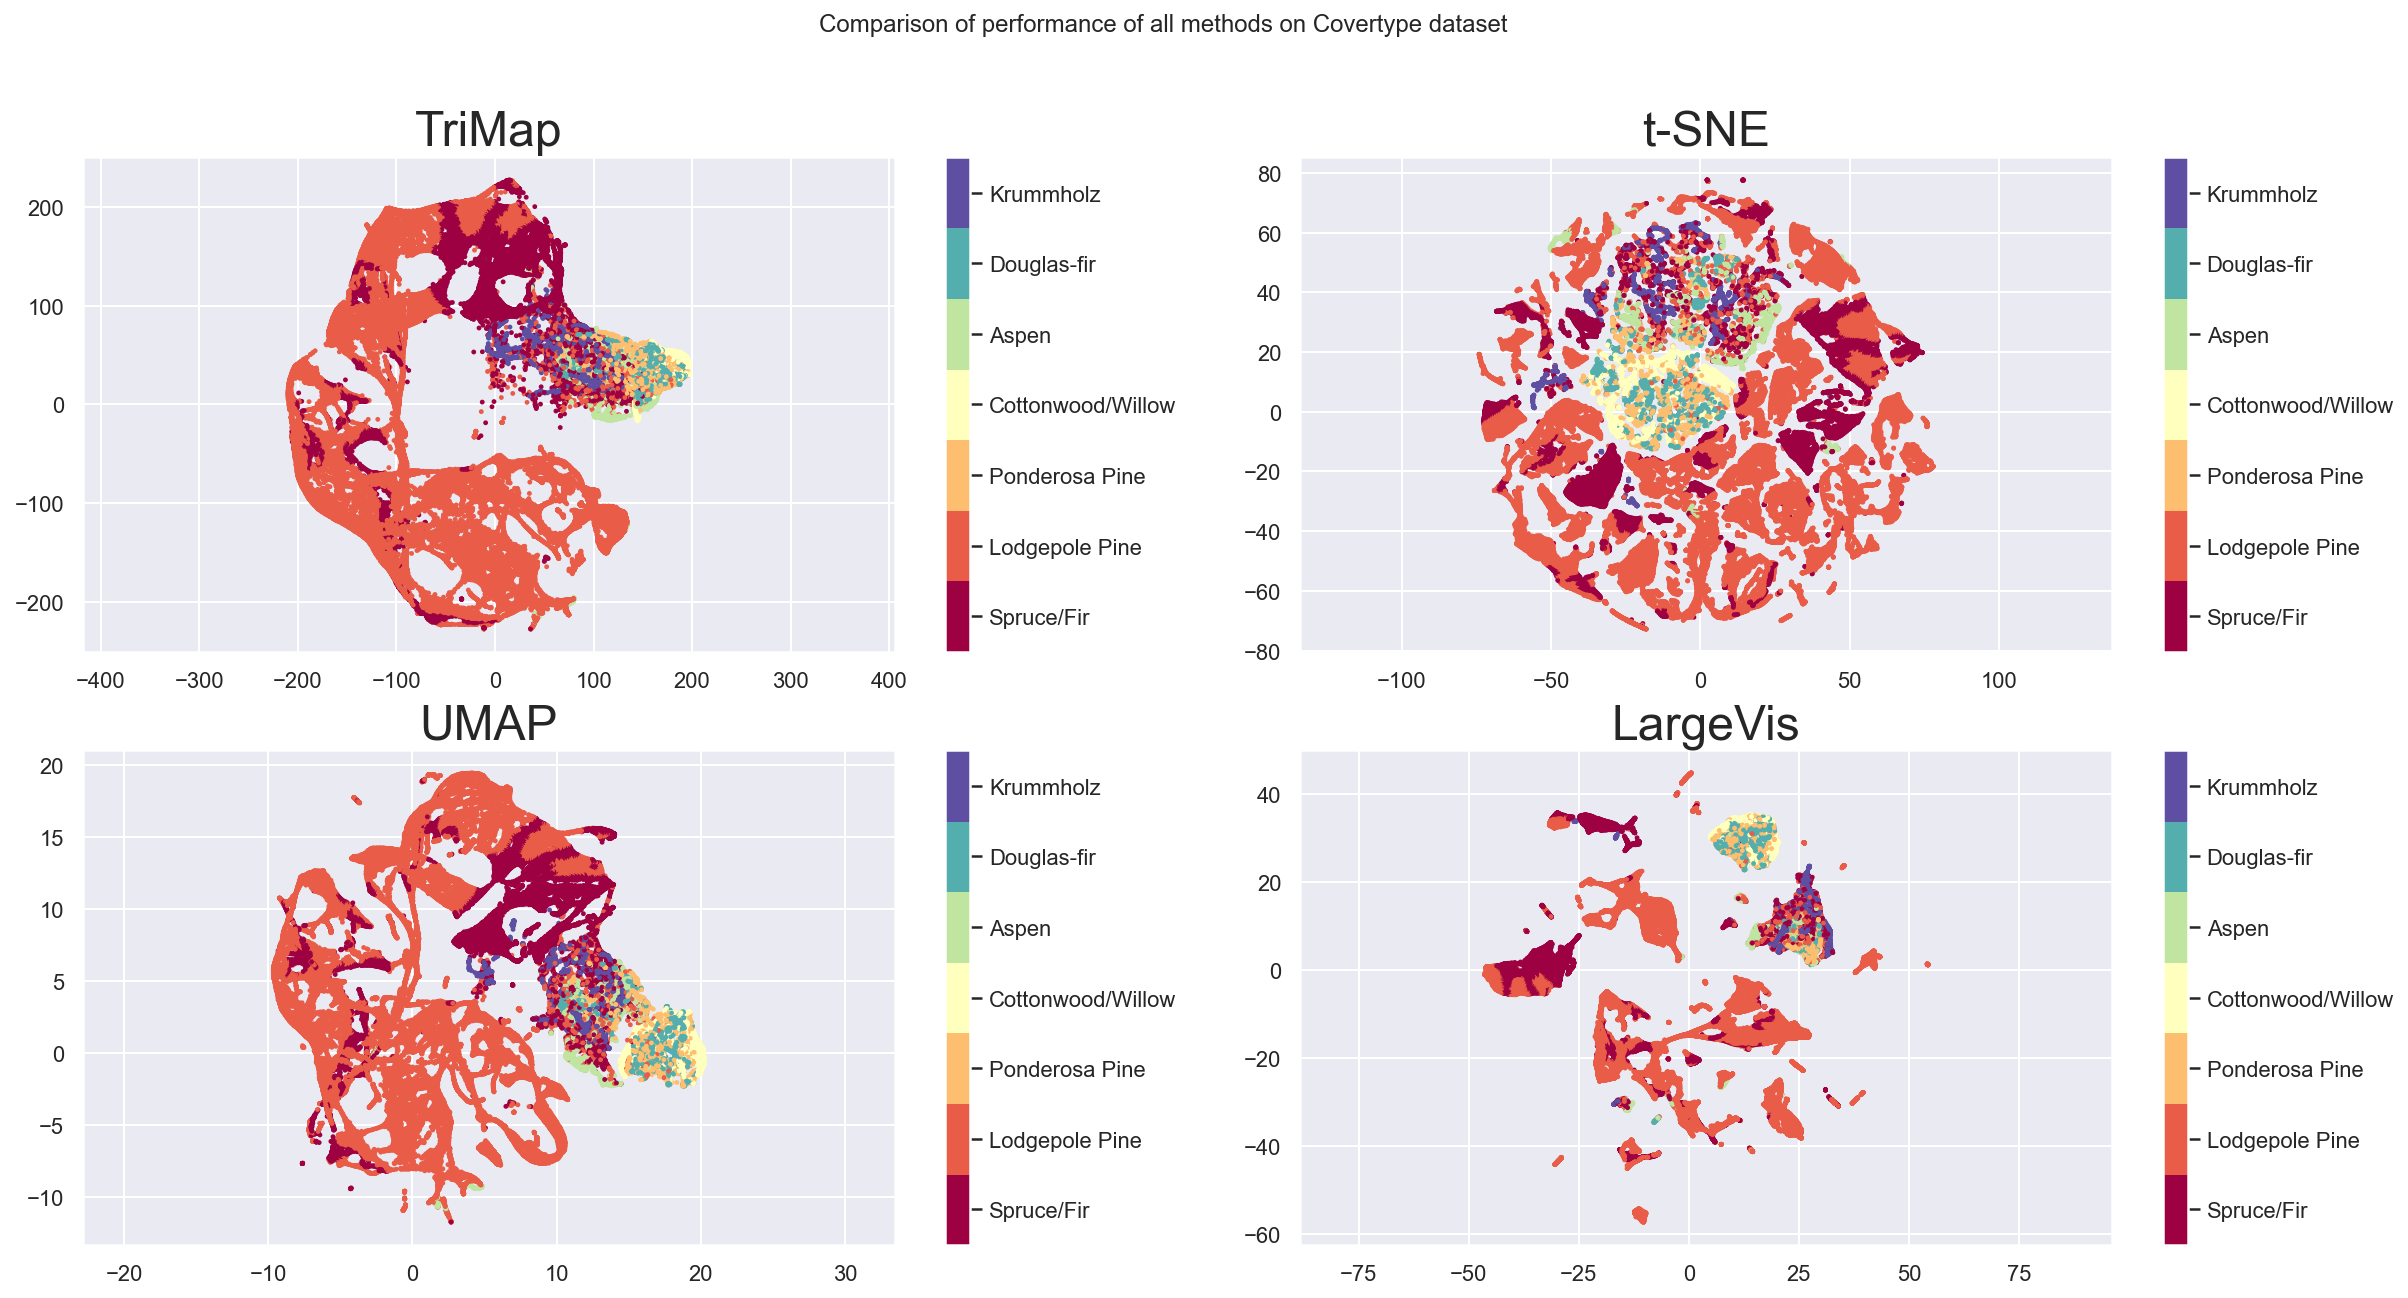

In [60]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparison of performance of all methods on Covertype dataset")

plt.subplot(2,2,1)
plt.scatter(covtype_tri[:, 0], covtype_tri[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('TriMap', fontsize=24);

plt.subplot(2,2,2)
plt.scatter(covtype_tsne[:, 0], covtype_tsne[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('t-SNE', fontsize=24);

plt.subplot(2,2,3)
plt.scatter(covtype_u[:, 0], covtype_u[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('UMAP', fontsize=24);

plt.subplot(2,2,4)
plt.scatter(covtype_l[:, 0], covtype_l[:, 1], s=2, c=covtype_s_target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
colorbar = plt.colorbar(boundaries=np.arange(1,9)-0.5)
colorbar.set_ticks(np.arange(8))
colorbar.set_ticklabels(covertype_target_names)
plt.title('LargeVis', fontsize=24);

plt.show()

In [61]:
print("Execution time in seconds")
print(f"TriMap: {t_covtype_tri/(10**9)}")
print(f"t-SNE: {t_covtype_tsne/(10**9)}")
print(f"UMAP: {t_covtype_u/(10**9)}")
print(f"LargeVis: {t_covtype_l}")

Execution time in seconds
TriMap: 37.077816
t-SNE: 129.0353613
UMAP: 33.3772403
LargeVis: 276.7667885999999


## Performance comparison for all datasets

### Execution time comparison

In [62]:
sum_tri = t_mnist_tri/(10**9) + t_fmnist_tri/(10**9) + t_news_tri/(10**9) + t_covtype_tri/(10**9)
sum_tsne = t_mnist_tsne/(10**9) + t_fmnist_tsne/(10**9) + t_news_tsne/(10**9) + t_covtype_tsne/(10**9)
sum_u = t_mnist_u/(10**9) + t_fmnist_u/(10**9) + t_news_u/(10**9) + t_covtype_u/(10**9)
sum_l = t_mnist_l + t_fmnist_l + t_news_l + t_covtype_l
avgs = np.array([sum_tri,sum_tsne,sum_u,sum_l]) / 4
norm = np.linalg.norm(avgs)
normalized_avgs = avgs/norm
print(normalized_avgs)

[0.03019606 0.12571887 0.03033401 0.99114218]


In [63]:
plt.bar(x=["TriMap","t-SNE","UMAP","LargeVis"], 
        height=normalized_avgs,
        width=0.5,
        color='purple',
        zorder=3)
plt.ylabel("t [s]")
plt.grid(True, axis='y', zorder=0)
plt.title(f"Normalized execution times")
plt.show()

TriMap had the best result timewise, as was expected. The reason behind LargeVis having the worst result is that we had to save data to a txt file, and then read it while using the method. That becomes very inefficient when working on datasets with a big number of dimensions.

### Scalability comparison

In [64]:
def run_on_n(n, dataset):
  times = []
  data, target = dataset.data[:n], dataset.target[:n]

  # TriMap
  start = timer()
  trimap.TRIMAP(verbose=False).fit_transform(data)
  end = timer()
  times.append(end - start)

  # t-SNE
  start = timer()
  TSNE(n_components=2).fit_transform(data)
  end = timer()
  times.append(end - start)

  # UMAP
  start = timer()
  UMAP(random_state=42, n_components=2).fit_transform(data)
  end = timer()
  times.append(end - start)

  return times

In [65]:
def plot_times(times, dataset):
  ind = np.arange(3)
  width = 0.2
  s1, t1 = times[0]
  s2, t2 = times[1]
  plt.bar(x=ind, height=t1, width=width, color='green', zorder=3, label=s1)
  plt.bar(x=ind+width, height=t2, width=width, color='red', zorder=3, label=s2)
  plt.xticks(ind + width / 2, ["TriMap","t-SNE","UMAP"])
  plt.ylabel("t [s]")
  plt.grid(True, axis='y', zorder=0)
  plt.legend(loc='best')
  plt.title(f"Time of execution - dataset {dataset}")

In [66]:
times_mnist = []
times_fmnist = []
times_news = []
times_covtype = []
for i in [1000, 2000]:
  times_mnist.append([i, run_on_n(i, mnist)])
  times_fmnist.append([i, run_on_n(i, fmnist)])
  times_news.append([i, run_on_n(i, news)])
  times_covtype.append([i, run_on_n(i, covtype)])
times_covtype

[[1000, [0.6374594000000116, 2.1502474999999777, 2.0913757999999234]],
 [2000, [1.2497999000000846, 4.330317499999978, 4.455283899999927]]]

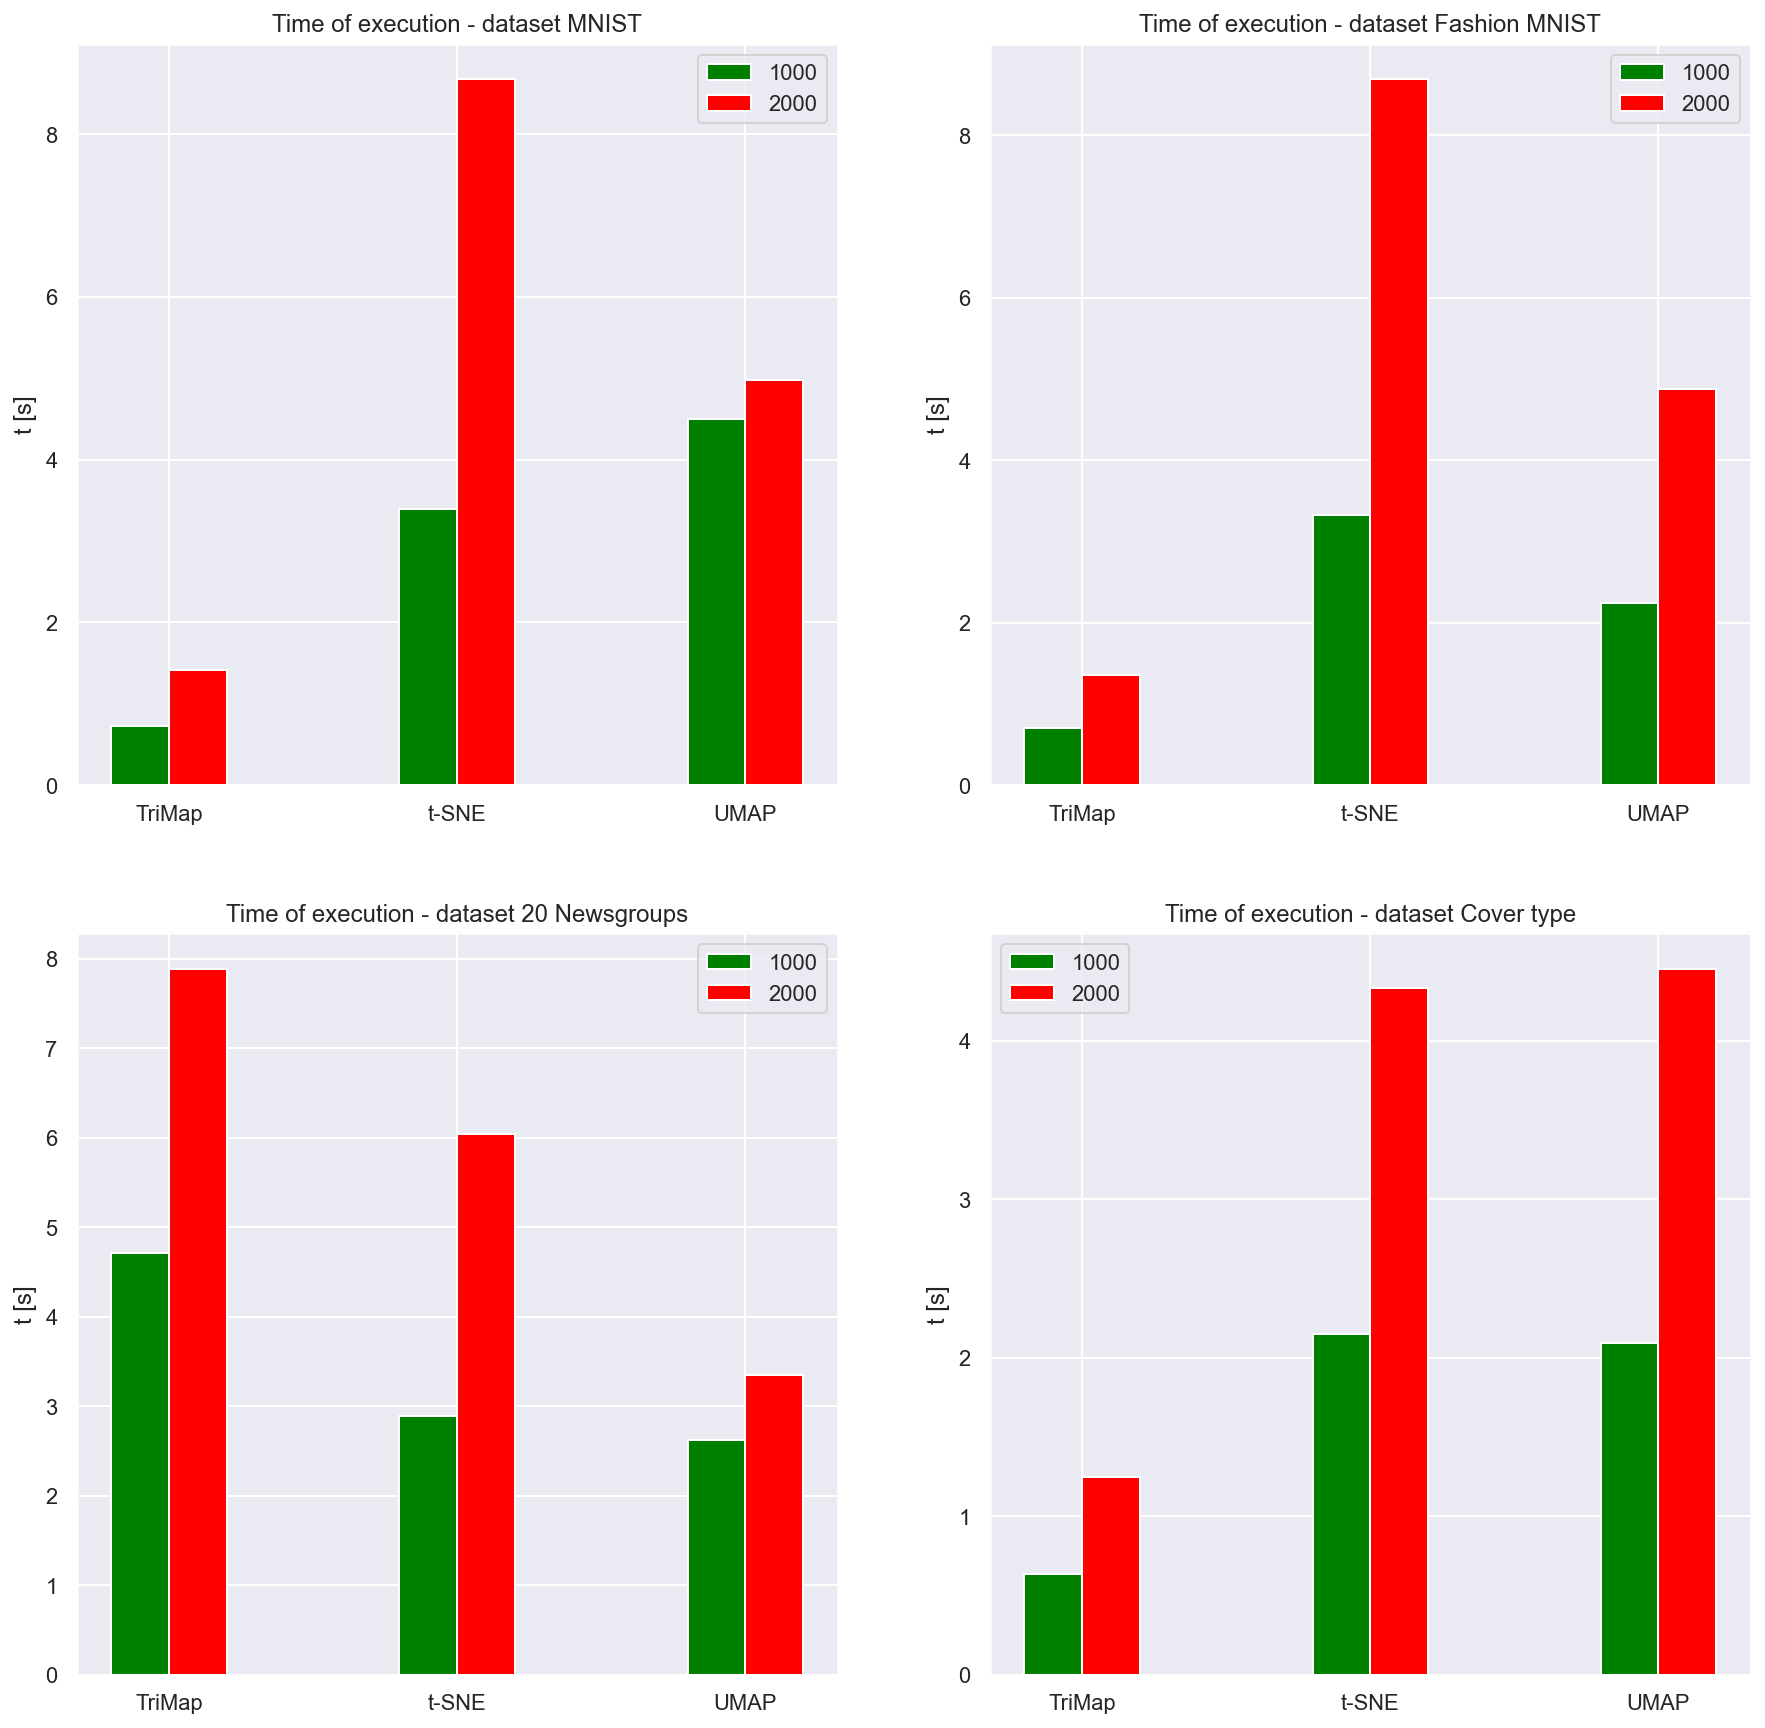

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plot_times(times_mnist, "MNIST")
plt.subplot(2,2,2)
plot_times(times_fmnist, "Fashion MNIST")
plt.subplot(2,2,3)
plot_times(times_news, "20 Newsgroups")
plt.subplot(2,2,4)
plot_times(times_covtype, "Cover type")
plt.show()

### Comparison of average distances

In [68]:
from scipy.spatial.distance import cdist, pdist

def avg_dist(number, data, target, target_num):
    """ Calculate average distances.
    Parameters:
        number - int representing group of points
        data - numpy array with point coordinates
        target - labels for points denoting their number group
        target_num - number of targets
    Returns a tuple: (dist_same, dist_diff_mean), where:
        dist_same - average distance between two points of the same group
        dist_diff_mean - average distance between two points belonging to different groups
    """
    # picking data points representing the 'number' group
    current_set = data[np.where(number==target.astype(int))]
    dist_diff_sum = []
    dist_same = 0

    # loop over all number groups
    for i in range(target_num):
        if i == number:
            # calculating average pairwise distance
            dist_same = np.mean(pdist(current_set))
            continue

        # picking data points representing one other group
        diff_set = data[np.where(i==target.astype(int))]

        # calculating average distance between points of those two groups
        dist = np.mean(cdist(current_set,diff_set))
        dist_diff_sum.append(dist)

    # averaging all group distances
    dist_diff_mean = np.mean(dist_diff_sum)
    return (dist_same, dist_diff_mean)

In [69]:
def average_distance(data,target,target_num):
    avg = ([],[])
    
    for num in range(0,target_num):
        n_avg,n_diff_avg = avg_dist(num,data,target,target_num)
        avg[0].append(n_avg)
        avg[1].append(n_diff_avg) 
    return avg

In [70]:
def calculate_metric(distances):
    x,y = distances
    return np.mean(x)/np.mean(y)

In [71]:
def plot_distances(title,target_names,distances):
    
    plt.figure(figsize=(20,5))
    for distance in distances:
        plt.plot(target_names,distance[0][0],label=distance[1])
    plt.title('Avg distances for each method in one group')  
    plt.xlabel(title)
    plt.ylabel('Distance metric')
    plt.xlim(0, len(target_names)-1)
    if(len(target_names)>10):
        plt.xticks(fontsize=12, rotation=40)
    plt.legend(loc='upper right')

    plt.figure(figsize=(20,5))
    for distance in distances:
        plt.plot(target_names,distance[0][1],label=distance[1])
    plt.title('Avg distances for each method in different groups')  
    plt.xlabel(title)
    plt.ylabel('Distance metric')
    plt.xlim(0, len(target_names)-1)
    if(len(target_names)>10):
        plt.xticks(fontsize=12, rotation=45)
    plt.legend(loc='upper right')

    plt.show()

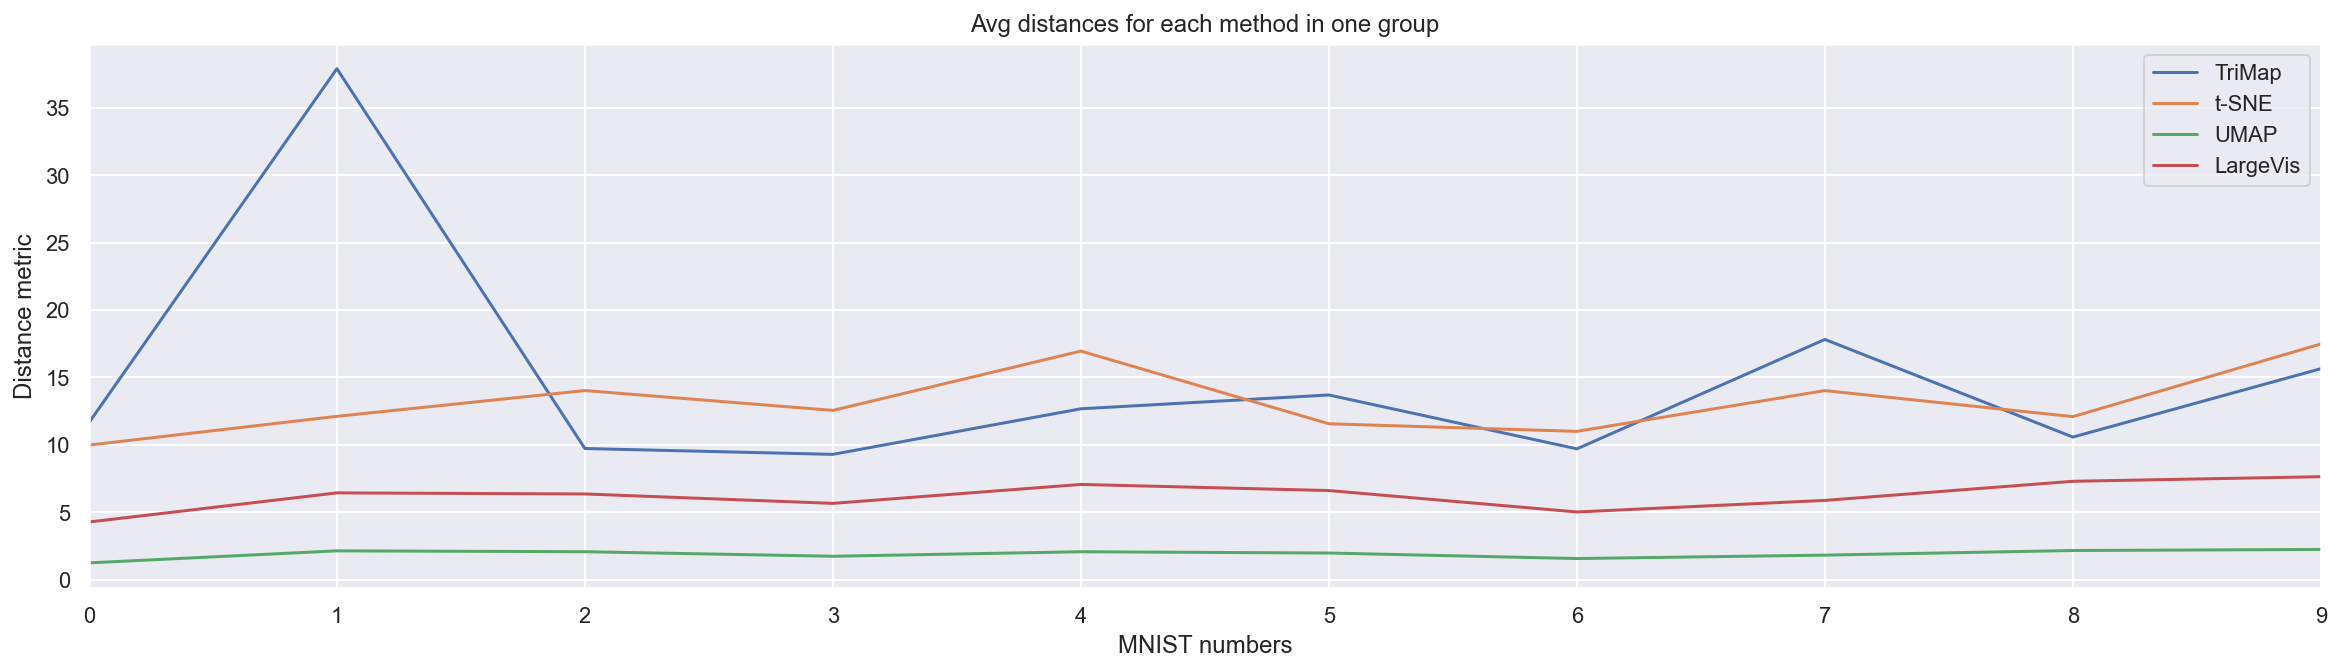

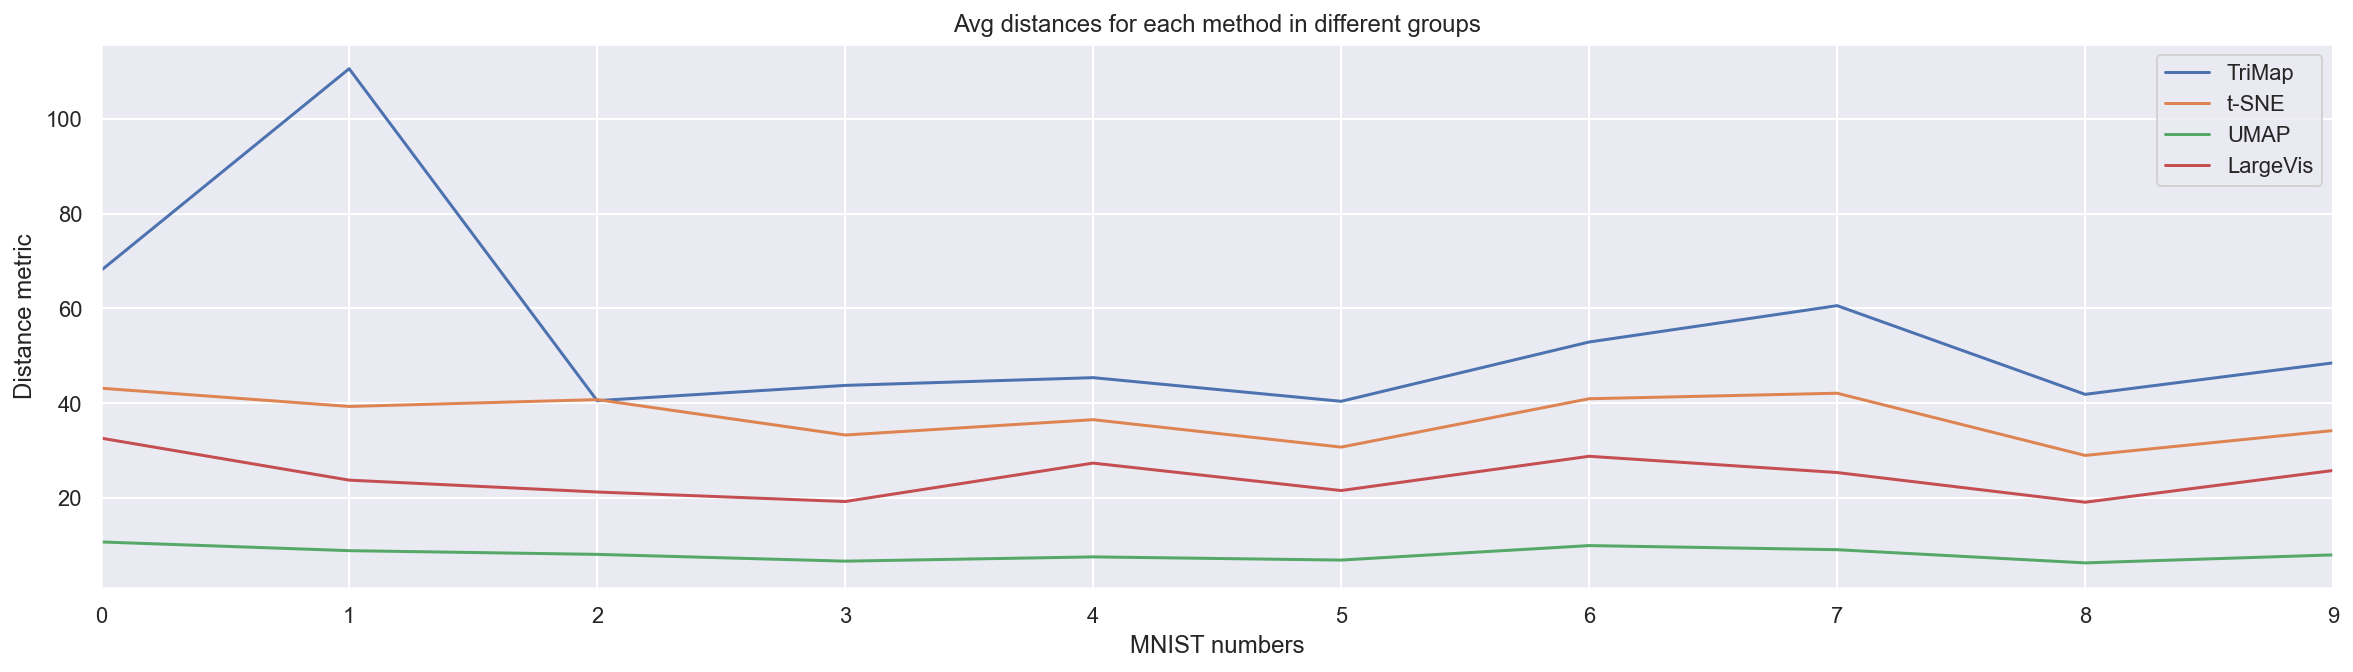

In [72]:
mnist_tri_distances = average_distance(mnist_tri,mnist_s_target,10)
mnist_tsne_distances = average_distance(mnist_tsne,mnist_s_target,10)
mnist_umap_distances = average_distance(mnist_u,mnist_s_target,10)
mnist_largevis_distances = average_distance(mnist_l,mnist_s_target,10)

mnist_targetnames = np.arange(0,10)

plot_distances("MNIST numbers",mnist_targetnames, \
               [(mnist_tri_distances,"TriMap"),(mnist_tsne_distances,"t-SNE"), \
                (mnist_umap_distances,"UMAP"),(mnist_largevis_distances,"LargeVis"),])

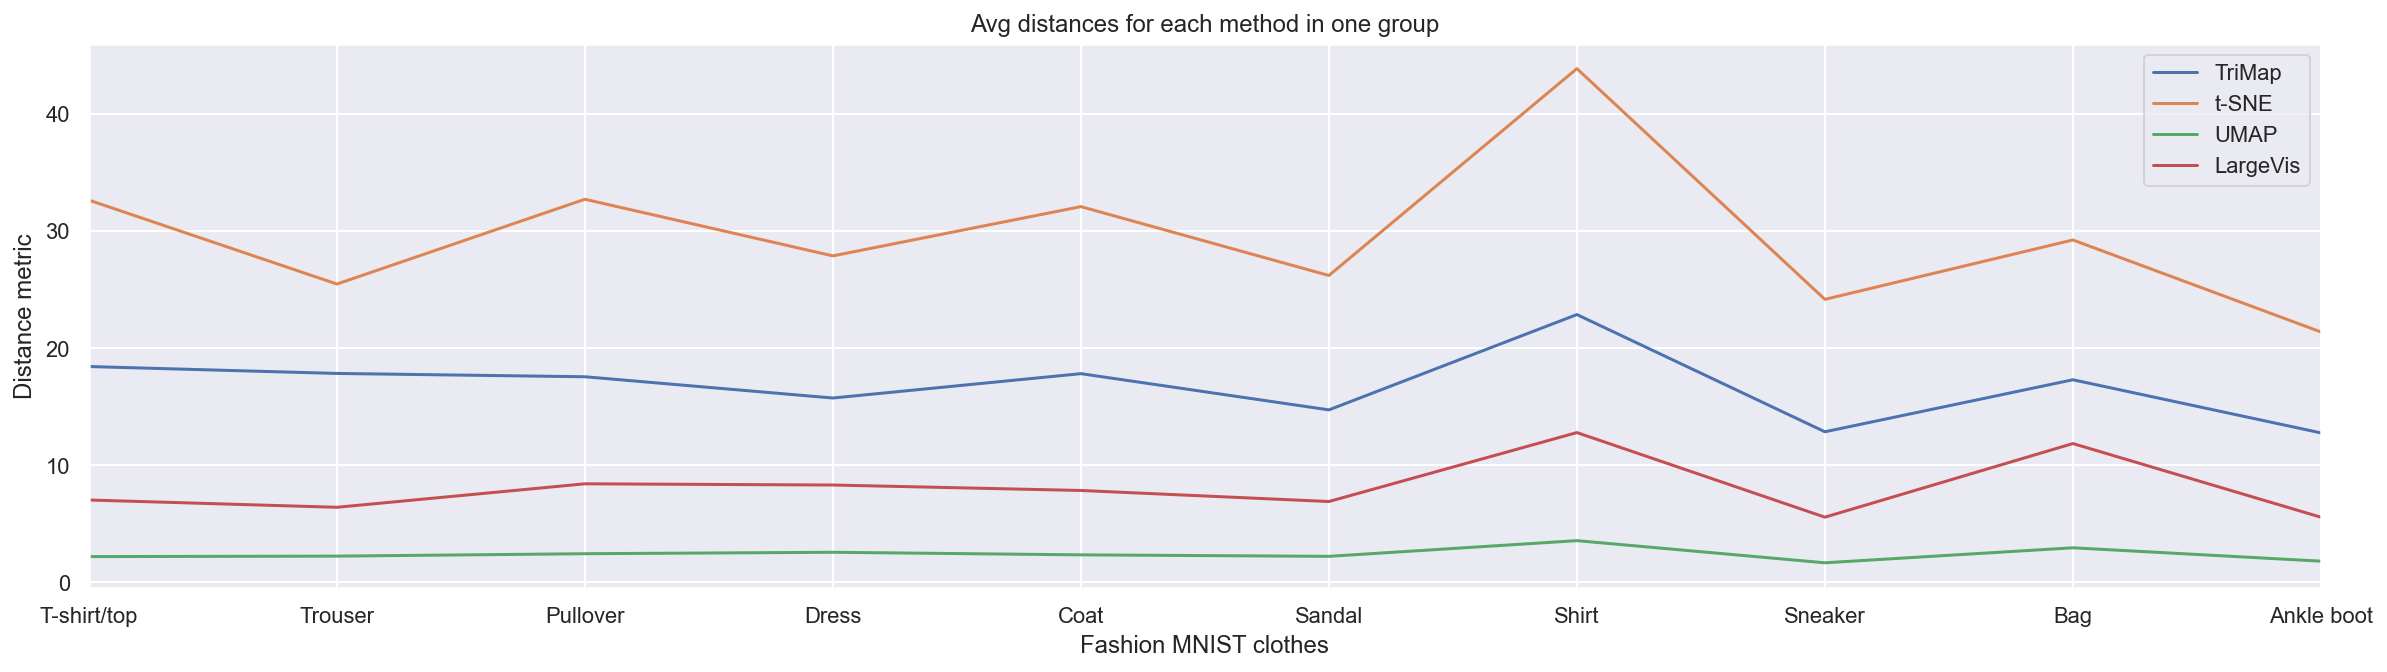

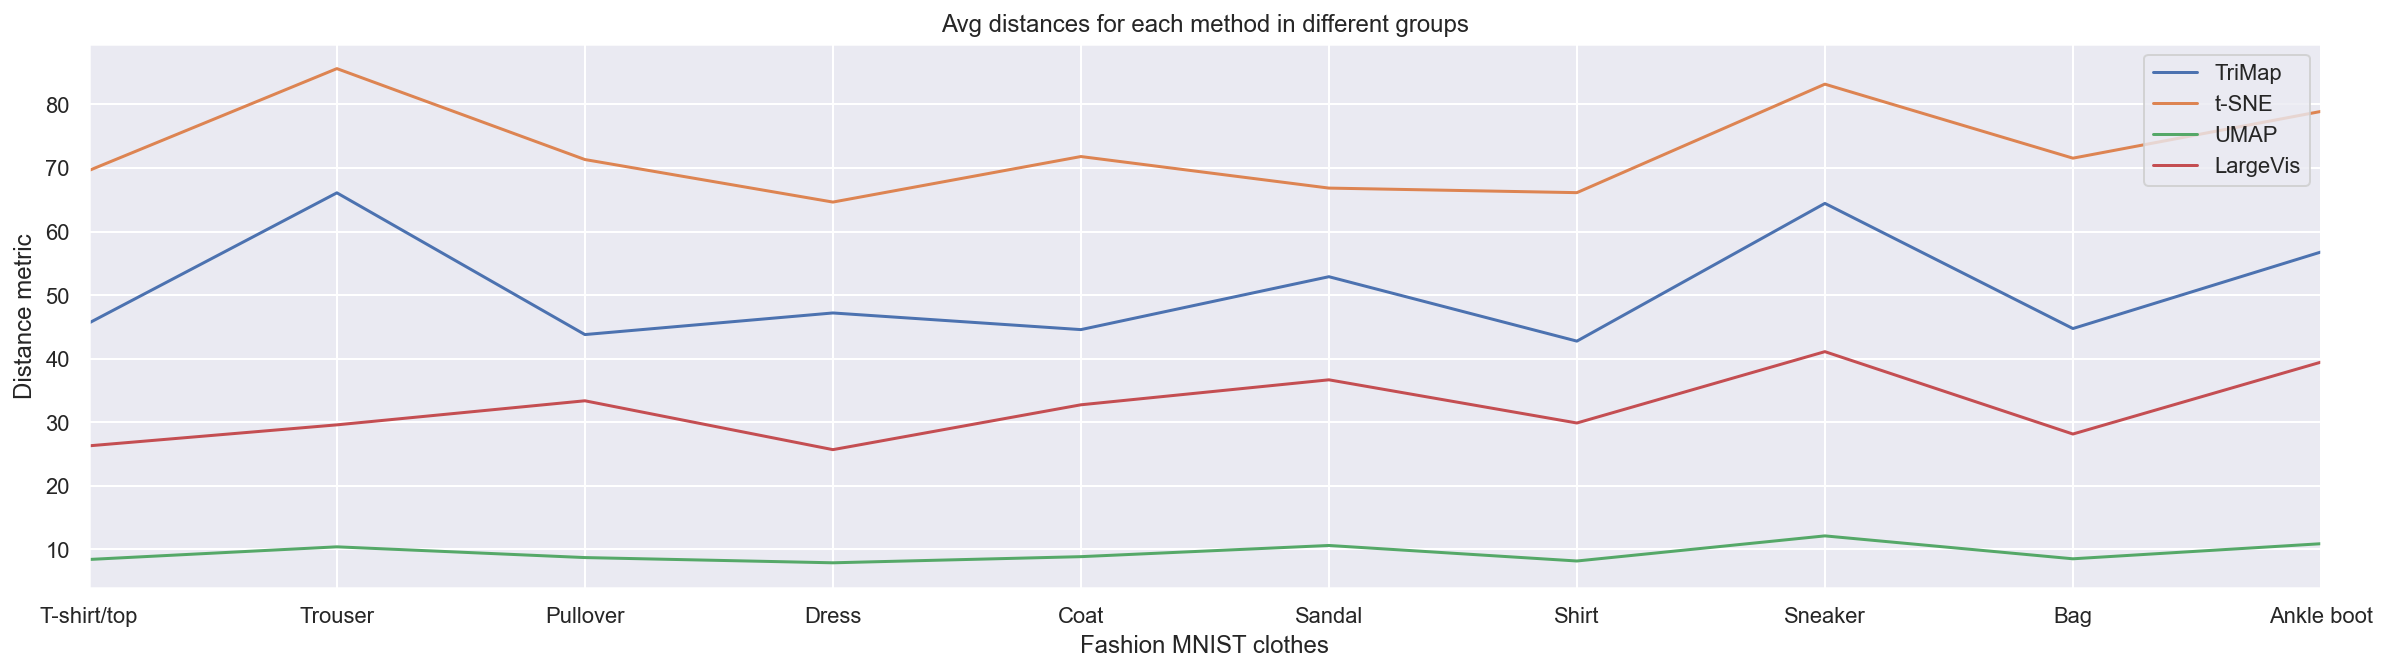

In [73]:
fmnist_tri_distances = average_distance(fmnist_tri,fmnist_s_target,10)
fmnist_tsne_distances = average_distance(fmnist_tsne,fmnist_s_target,10)
fmnist_umap_distances = average_distance(fmnist_u,fmnist_s_target,10)
fmnist_largevis_distances = average_distance(fmnist_l,fmnist_s_target,10)

plot_distances("Fashion MNIST clothes",fmnist_labels, \
               [(fmnist_tri_distances,"TriMap"),(fmnist_tsne_distances,"t-SNE"), \
                (fmnist_umap_distances,"UMAP"),(fmnist_largevis_distances,"LargeVis"),])

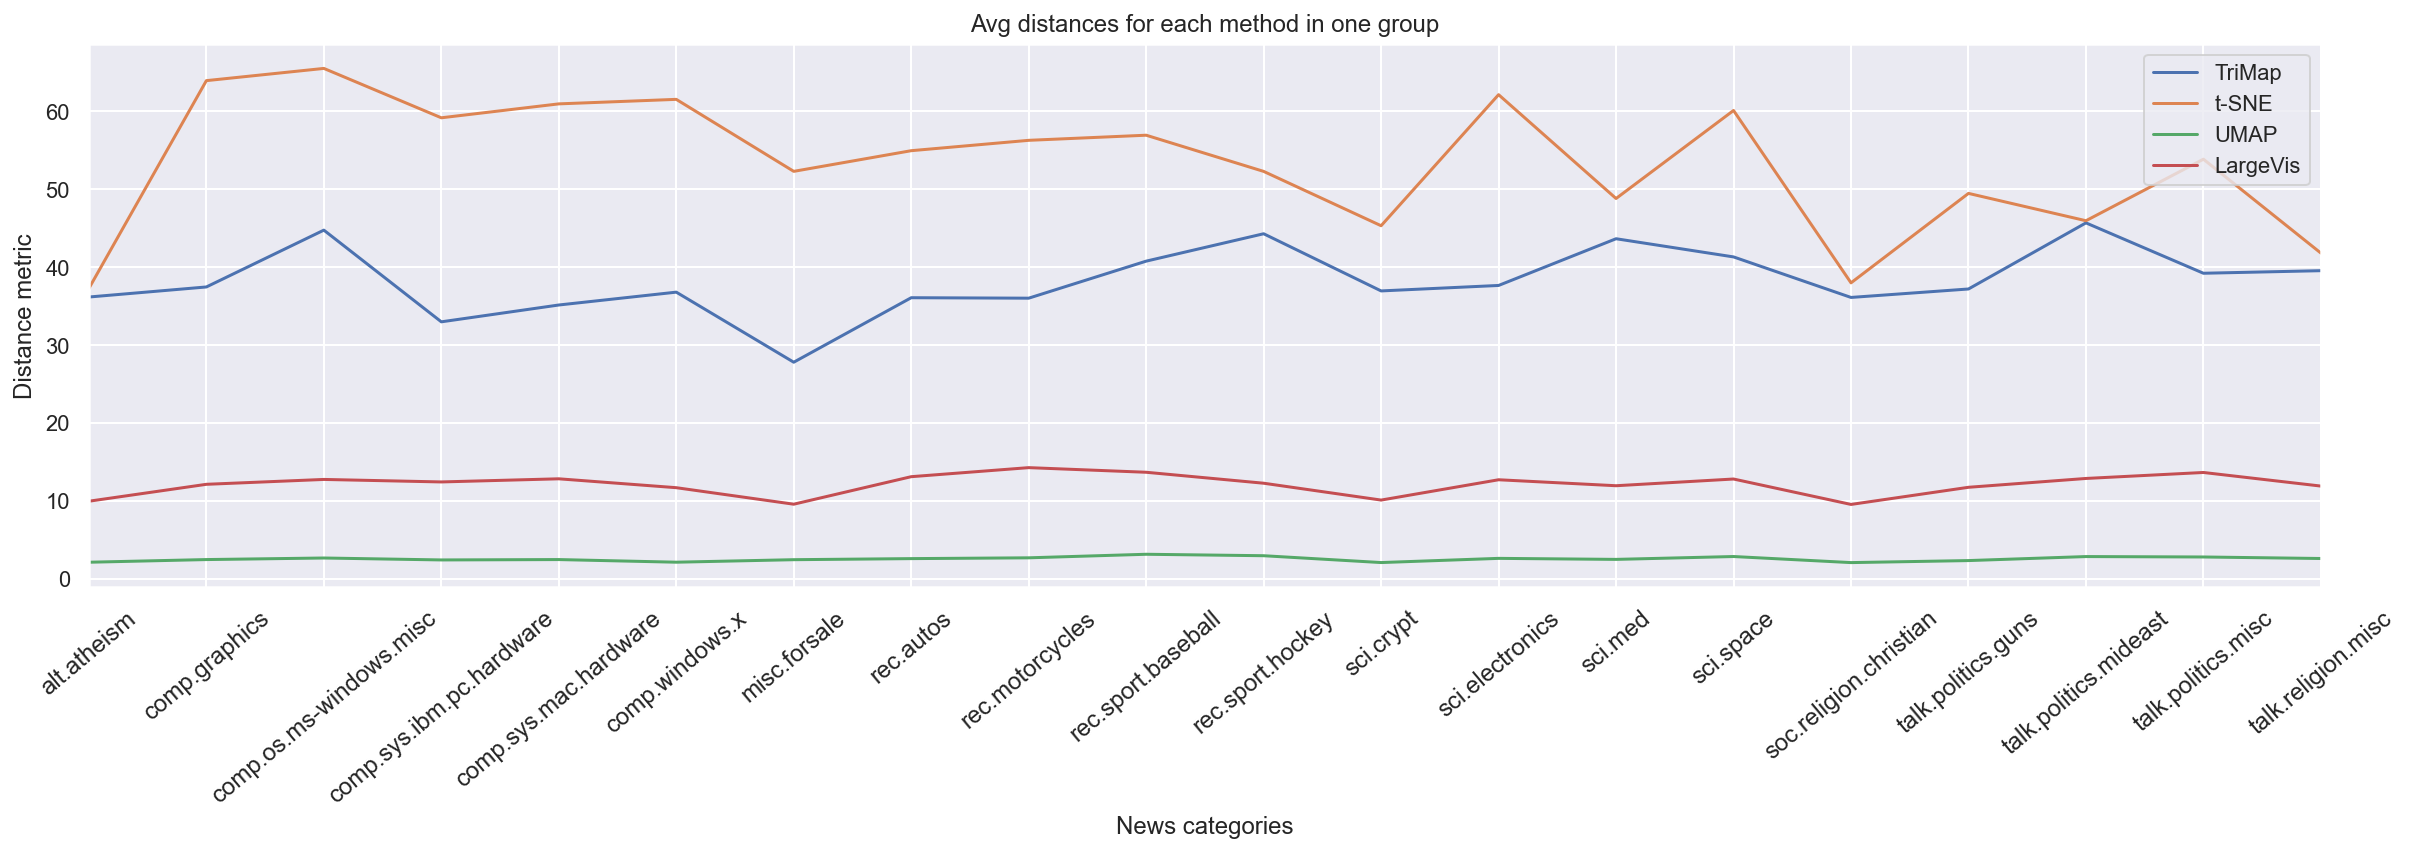

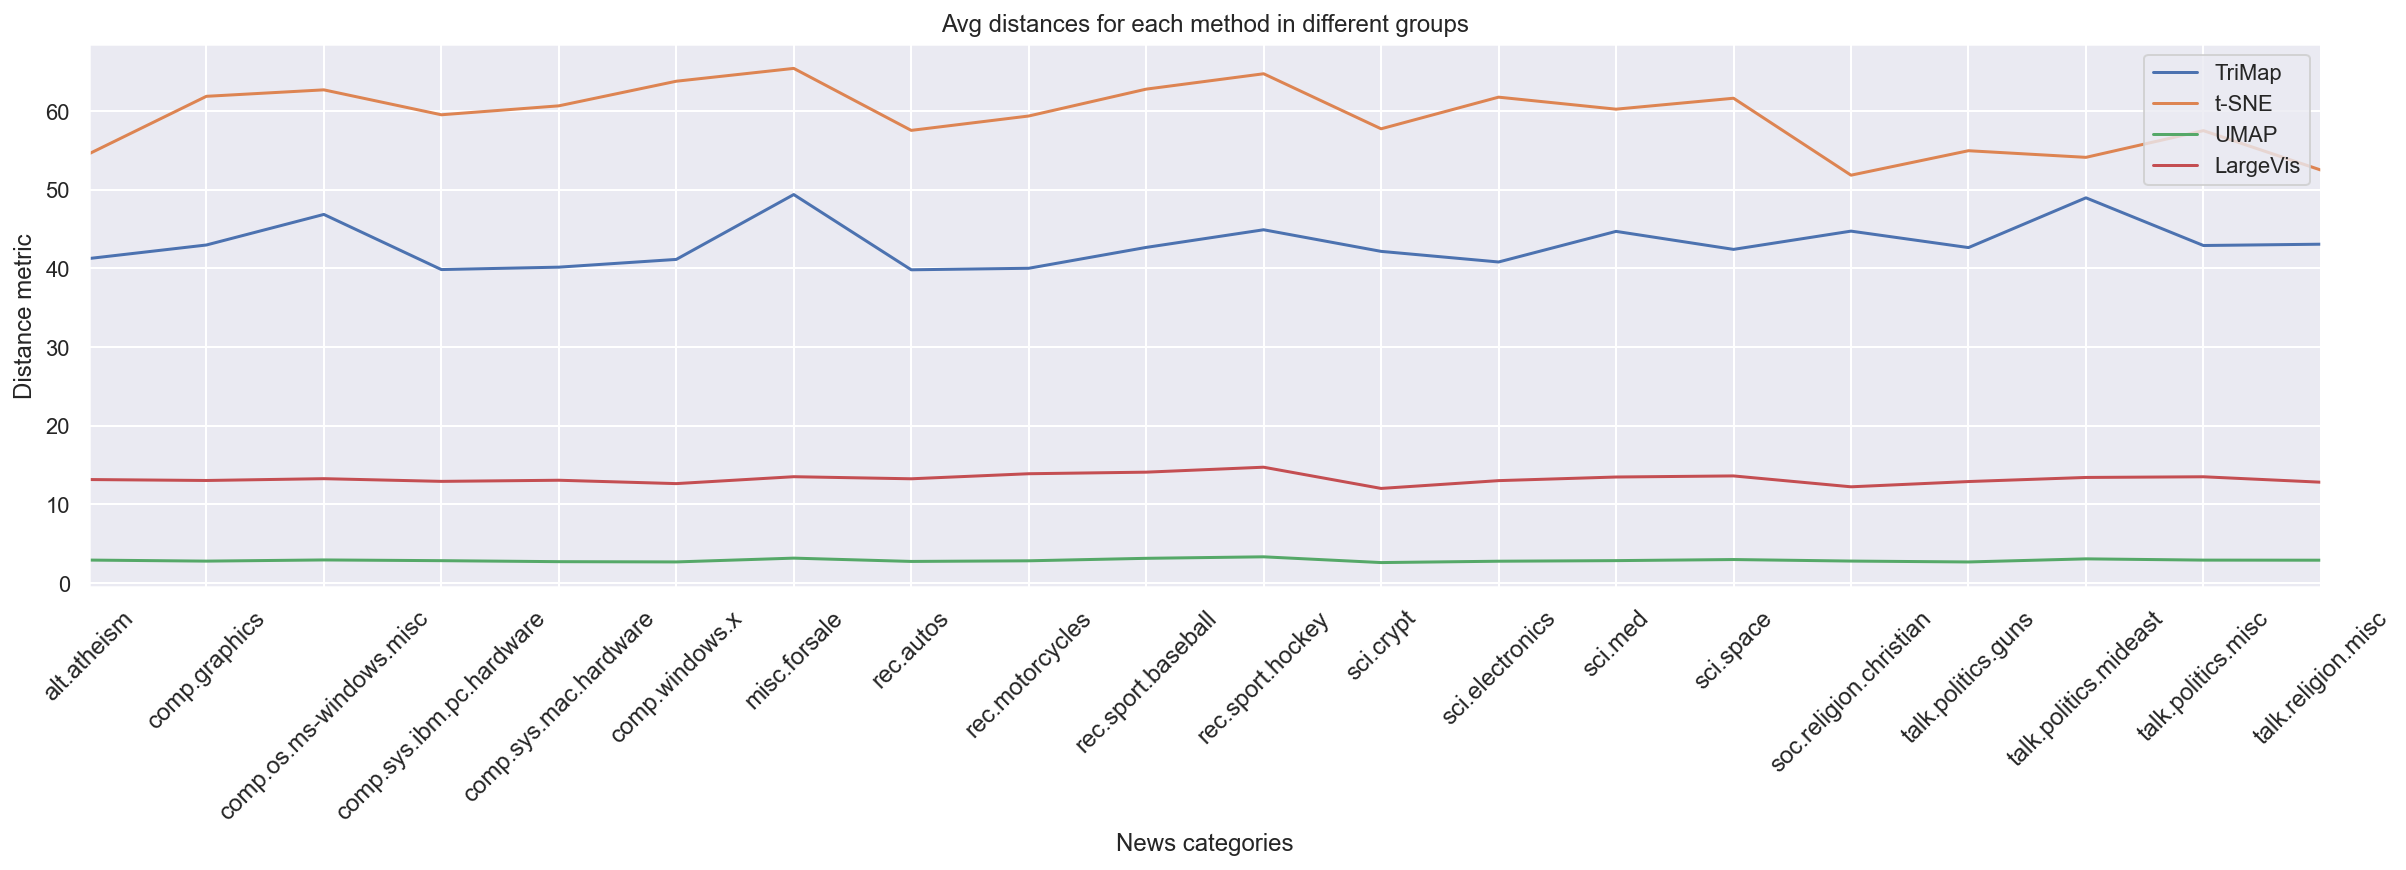

In [74]:
news_tri_distances = average_distance(news_tri,news_s_target,20)
news_tsne_distances = average_distance(news_tsne,news_s_target,20)
news_umap_distances = average_distance(news_u,news_s_target,20)
news_largevis_distances = average_distance(news_l,news_s_target,20)

plot_distances("News categories",news.target_names, \
               [(news_tri_distances,"TriMap"),(news_tsne_distances,"t-SNE"), \
                (news_umap_distances,"UMAP"),(news_largevis_distances,"LargeVis"),])

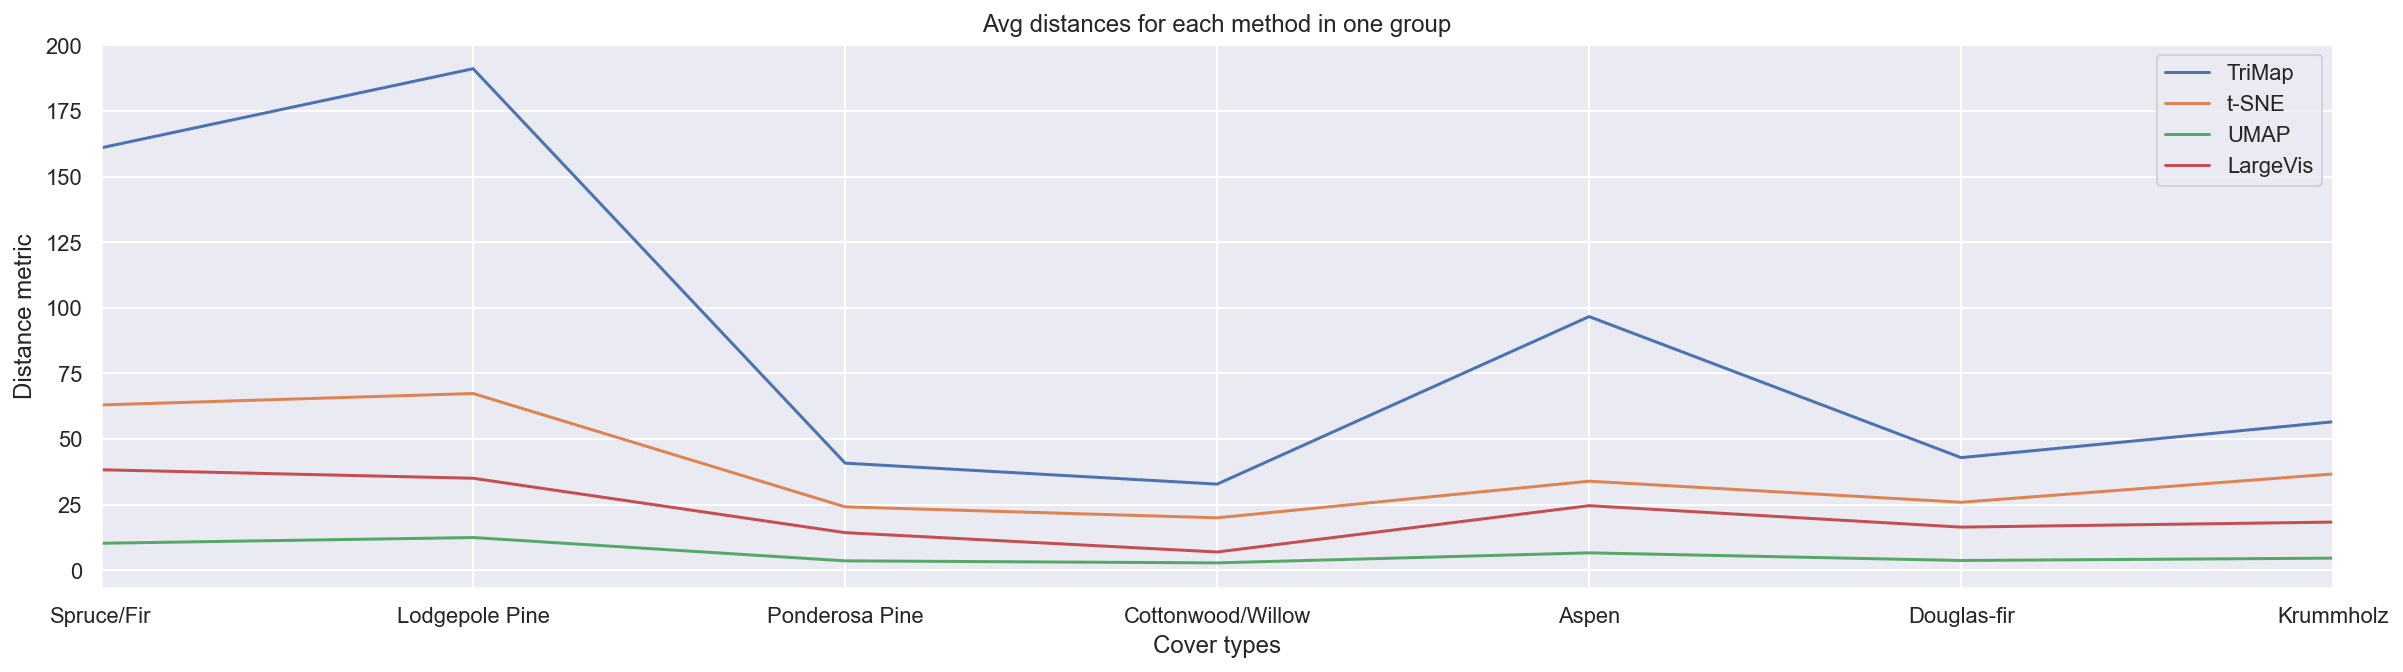

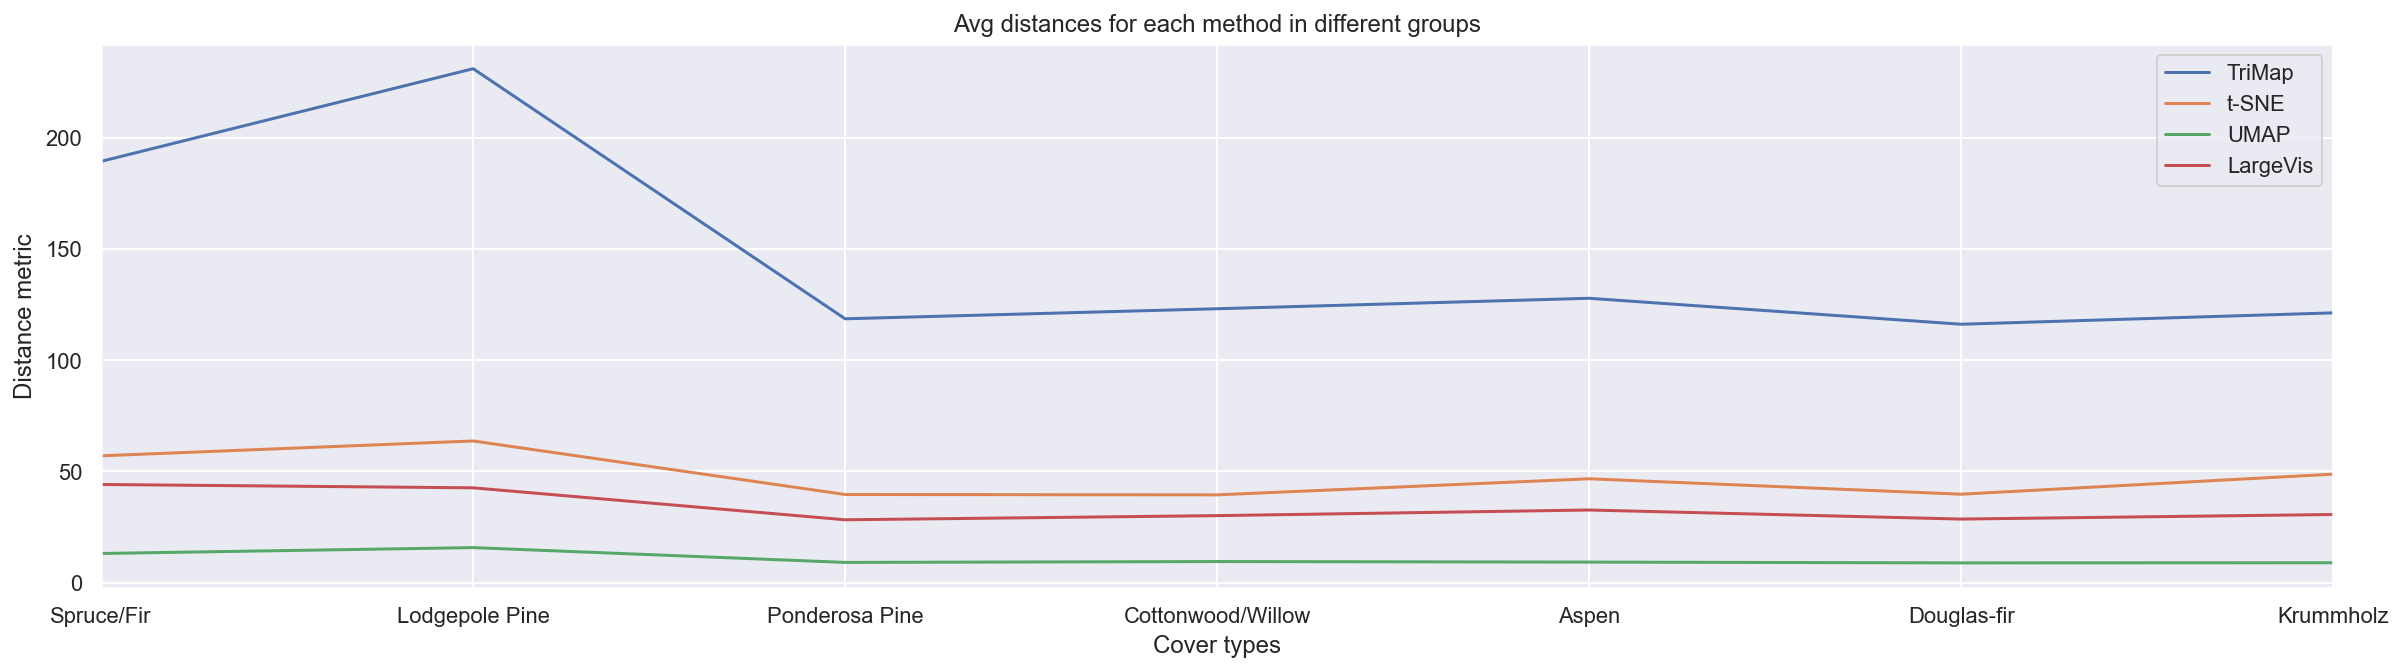

In [75]:
covtype_tri_distances = average_distance(covtype_tri,covtype_s_target-1,len(covertype_target_names))
covtype_tsne_distances = average_distance(covtype_tsne,covtype_s_target-1,len(covertype_target_names))
covtype_umap_distances = average_distance(covtype_u,covtype_s_target-1,len(covertype_target_names))
covtype_largevis_distances = average_distance(covtype_l,covtype_s_target-1,len(covertype_target_names))

plot_distances("Cover types",covertype_target_names, \
               [(covtype_tri_distances,"TriMap"),(covtype_tsne_distances,"t-SNE"), \
                (covtype_umap_distances,"UMAP"),(covtype_largevis_distances,"LargeVis"),])

In [76]:
trimap_metrics = [calculate_metric(mnist_tri_distances),calculate_metric(fmnist_tri_distances), \
                  calculate_metric(news_tri_distances),calculate_metric(covtype_tri_distances)]
print("Trimap:\t\t",trimap_metrics)
t_metrics = [calculate_metric(mnist_tsne_distances),calculate_metric(fmnist_tsne_distances), \
                  calculate_metric(news_tsne_distances),calculate_metric(covtype_tsne_distances)]
print("t-SNE:\t\t",t_metrics)
u_metrics = [calculate_metric(mnist_umap_distances),calculate_metric(fmnist_umap_distances), \
                  calculate_metric(news_umap_distances),calculate_metric(covtype_umap_distances)]
print("UMAP:\t\t",u_metrics)
l_metrics = [calculate_metric(mnist_largevis_distances),calculate_metric(fmnist_largevis_distances), \
                  calculate_metric(news_largevis_distances),calculate_metric(covtype_largevis_distances)]
print("LargeVis:\t",l_metrics)

Trimap:		 [0.2690966738648091, 0.32983960859637707, 0.8883407898745339, 0.6053101450362451]
t-SNE:		 [0.3562807035447396, 0.4050577266771163, 0.8995960064437174, 0.8098284607074997]
UMAP:		 [0.23124922958184105, 0.25405118715430475, 0.8771558159646229, 0.596061249925325]
LargeVis:	 [0.254107321646679, 0.24980670623422785, 0.91342438150091, 0.6512000863951382]


In [77]:
avg_trimap_metrics = np.average(trimap_metrics)
print("Trimap:\t\t",avg_trimap_metrics)
avg_t_metrics = np.average(t_metrics)
print("t-SNE:\t\t",avg_t_metrics)
avg_u_metrics = np.average(u_metrics)
print("UMAP:\t\t",avg_u_metrics)
avg_l_metrics = np.average(l_metrics)
print("LargeVis:\t",avg_l_metrics)

Trimap:		 0.5231468043429913
t-SNE:		 0.6176907243432683
UMAP:		 0.48962937065652345
LargeVis:	 0.5171346239442387


Text(0.5, 1.0, 'Final result of tested methods')

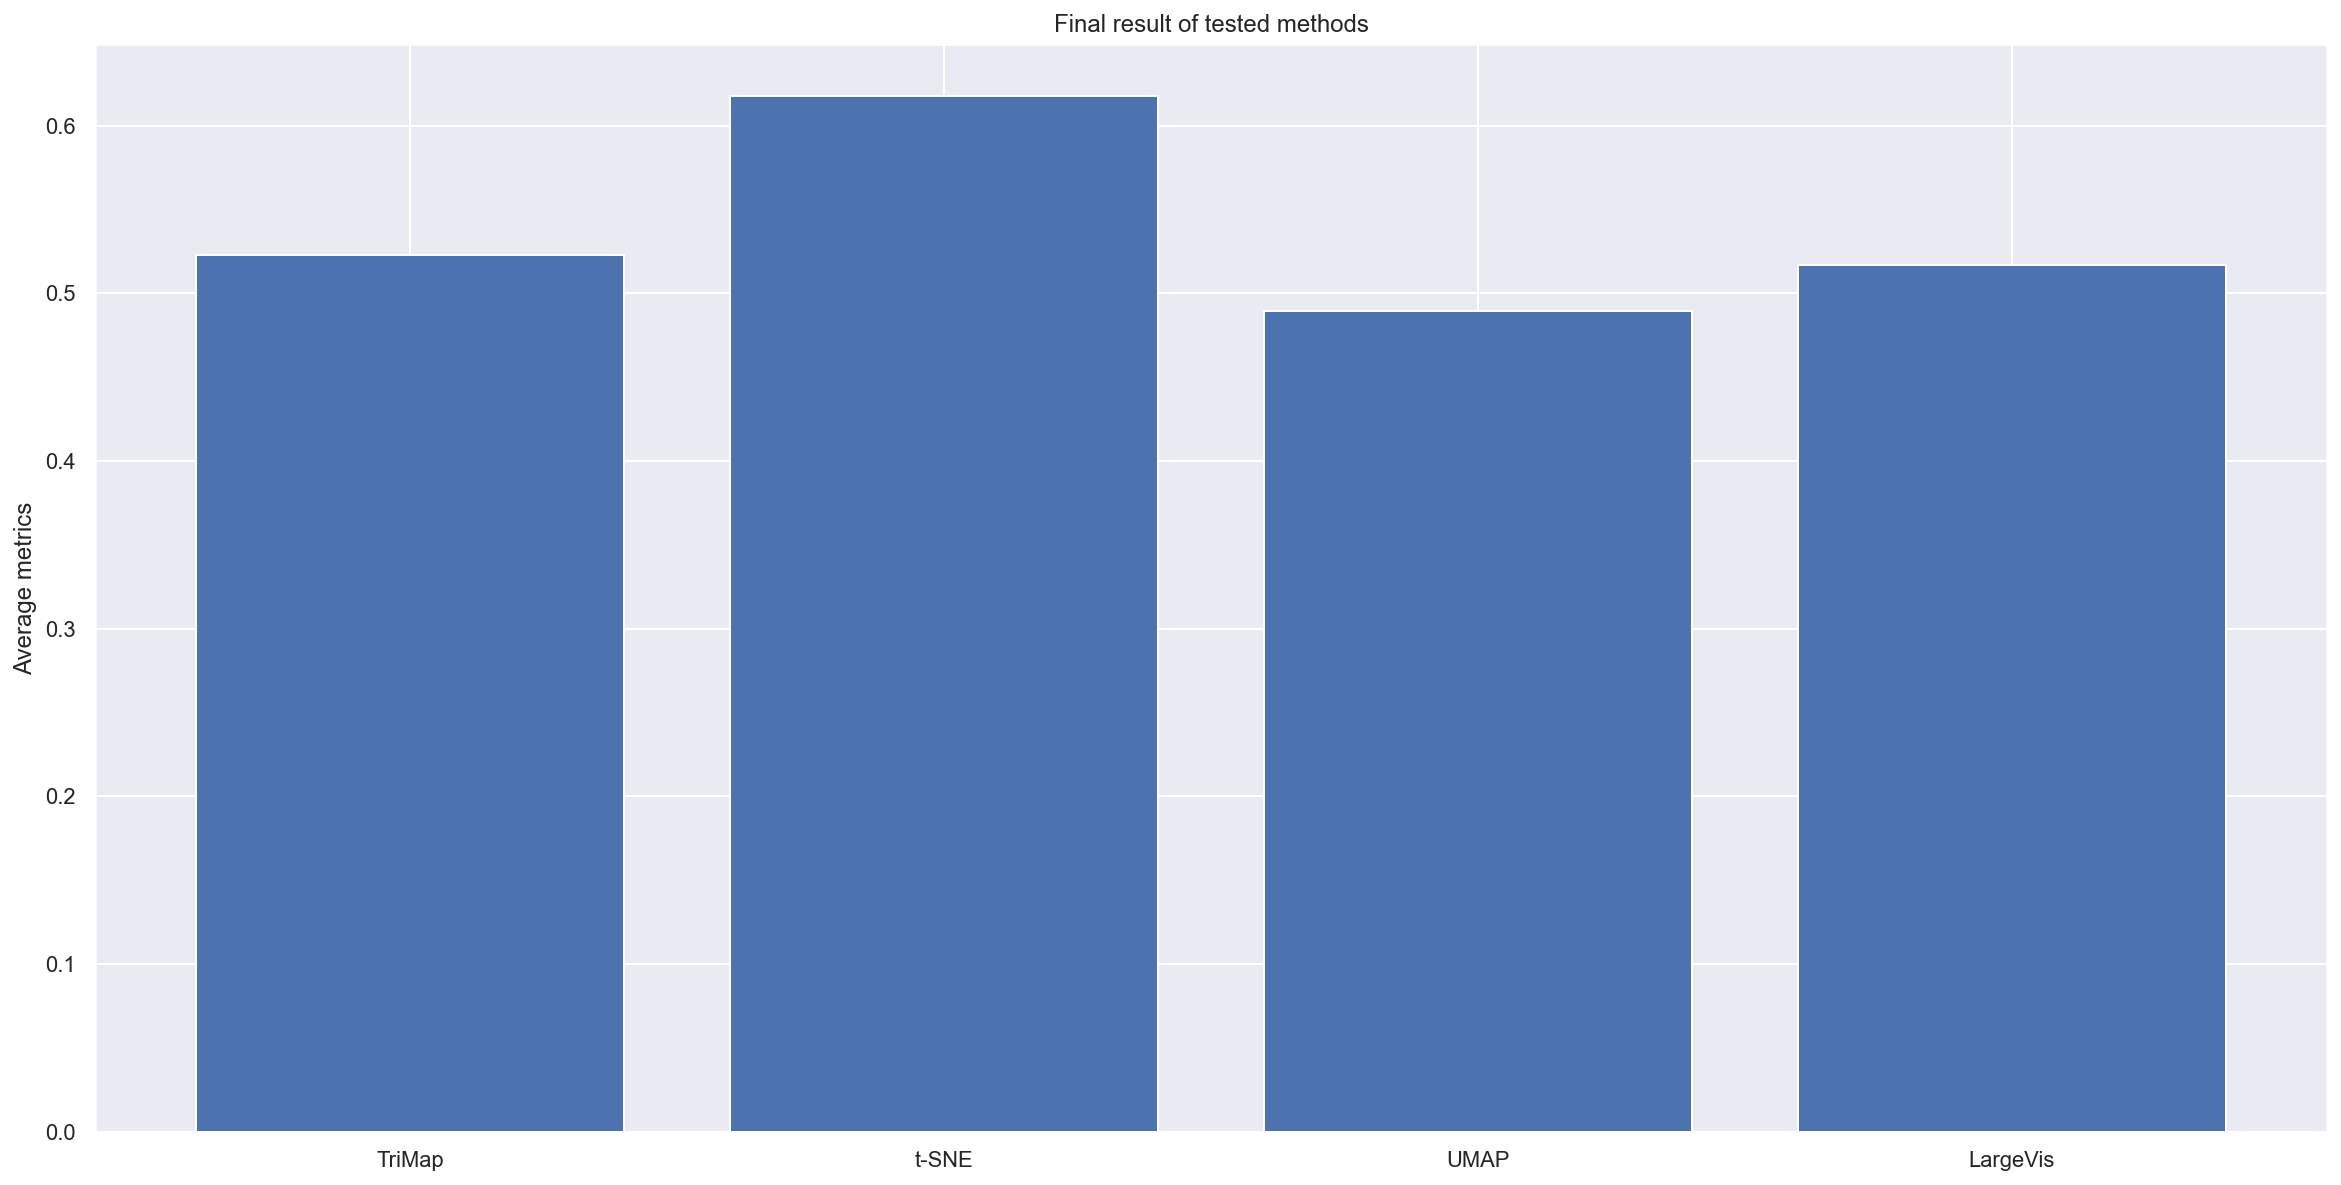

In [78]:
plt.bar(["TriMap","t-SNE","UMAP","LargeVis"],[avg_trimap_metrics,avg_t_metrics,avg_u_metrics,avg_l_metrics])
plt.ylabel("Average metrics")
plt.title("Final result of tested methods")